<a href="https://colab.research.google.com/github/eeuunnjjiii/Franchise-Guide/blob/main/3.EDA/3.EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 한글 깨짐 방지
!apt-get install fonts-nanum*
!apt-get install fontconfig
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

# 화질 선명하게 설정
%config InlineBackend.figure_format='retina'

# DataFrame 컬럼 전체보기 설정
pd.set_option('display.max_columns', None) 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-gothic-light' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
fonts-nanum is already the newest version (20170925-1).
fonts-nanum-coding is already the newest version (2.5-1).
fonts-nanum-eco is already the newest version (1.000-6).
fonts-nanum-extra is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fontconfig is already the newest version (2.12.6-0ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
NanumGothic Eco


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# 데이터 가져오기
data_2020 = pd.read_csv('/content/drive/MyDrive/franchise_data/data_2020.csv', index_col=0)
df = pd.read_csv('/content/drive/MyDrive/franchise_data/total.csv', index_col=0).reset_index(drop=True)

#1. Data 설명
- 전체 단위 : 천원
- 2015년~2019년 데이터 (2020년 데이터는 입력되지 않은 브랜드들도 다수 존재해 제거 후 분석 진행)

1. **가맹본부 일반 현황**
- 브랜드 : 영업표지
- 상호 : 회사명
- 가맹본부임직원수  
- 법위반횟수 : 최근 3년간 법 위반 사실
- 업종 : 한식, 분식, 일식, 중식, 치킨, 피자, 서양식, 패스트푸드, 기타외국식, 커피, 음료(커피 외), 아이스크림/빙수, 제과제빵, 주점, 기타외식

2. **가맹본부 재무 상황**
- 자산    
- 자본 
- 부채    
- 매출액   
- 영업이익  
- 당기순이익 

3. **가맹사업 현황**
- 가맹사업개시일
- 가맹사업년수
- 가맹점수  

4. **가맹점 변동 현황**
- 신규개점  
- 계약종료  
- 계약해지  
- 명의변경  

5. **가맹점 사업자의 매출액**
- 평균매출액 
- 면적당_평균매출액 : 3.3㎡당 평균 매출액

6. **가맹점사업자의 부담금**
- 가맹비(가입비)  
- 교육비   
- 보증금   
- 기타비용 : 인테리어 비용 포함
- 합계 : 가맹비+교육비+보증금+기타비용
- 인테리어비용_면적당 : 3.3㎡ 기준
- 인테리어비용_기준면적당 : ㎡ 기준
- 인테리어비용_총비용    

-------------------훈련데이터 사용---------------------

전체 데이터 중, 정보공개서 열람을 통해 쉽게 얻을 수 있는 특성만 데이터로 사용

7. **기타**
- 부채비율 : 부채/자본 => 타인자본의 의존도, 낮을수록 좋음 (200%가 넘으면 위험하다고 간주)
- 자기자본비율 : 자본/자산 (%) => 회사의 총 재산인 자산에서 자본이 차지하는 비율, 높을수록 좋음 (50%에 가깝거나 높으면 안정적)
- 영업이익률 : 영업이익/매출액
- 매출액순이익률 : 당기순이익/매출액
- 자기자본순이익률 : 당기순이익/자본

8. **참고사항**
- 자산 = 자본 + 부채
- 대기업 : 자산규모 5조원 이상
- 중견기업 : 상시 직원수 1,000명 이상 / 자산 총액 5000억 이상 / 자기자본 1000억이상 / 3년 평균 매출 1500억 이상
- 영업이익 : 매출총이익(매출-매출원가)에서 판매관리비 및 일반 관리비를 뺀 금액
- 당기순이익 : 경상이익(영업이익-금융비용 및 영업외손익)에서 법인세를 제한 것
> 정상적인 상황에서는 영업이익과 당기순이익이 비슷한 경우가 일반적, **기업의 핵심역량을 반영하는 것은 영업이익**

## 전체 데이터 확인

In [ ]:
# 2020년 브랜드 수 병합
tmp = pd.DataFrame(df[df['기준년도']<2020]['기준년도'].value_counts().reset_index())
tmp.columns = ['기준년도','브랜드수']
tmp = pd.concat([tmp, pd.DataFrame({'기준년도':[2020], '브랜드수':[len(data_2020)]})])

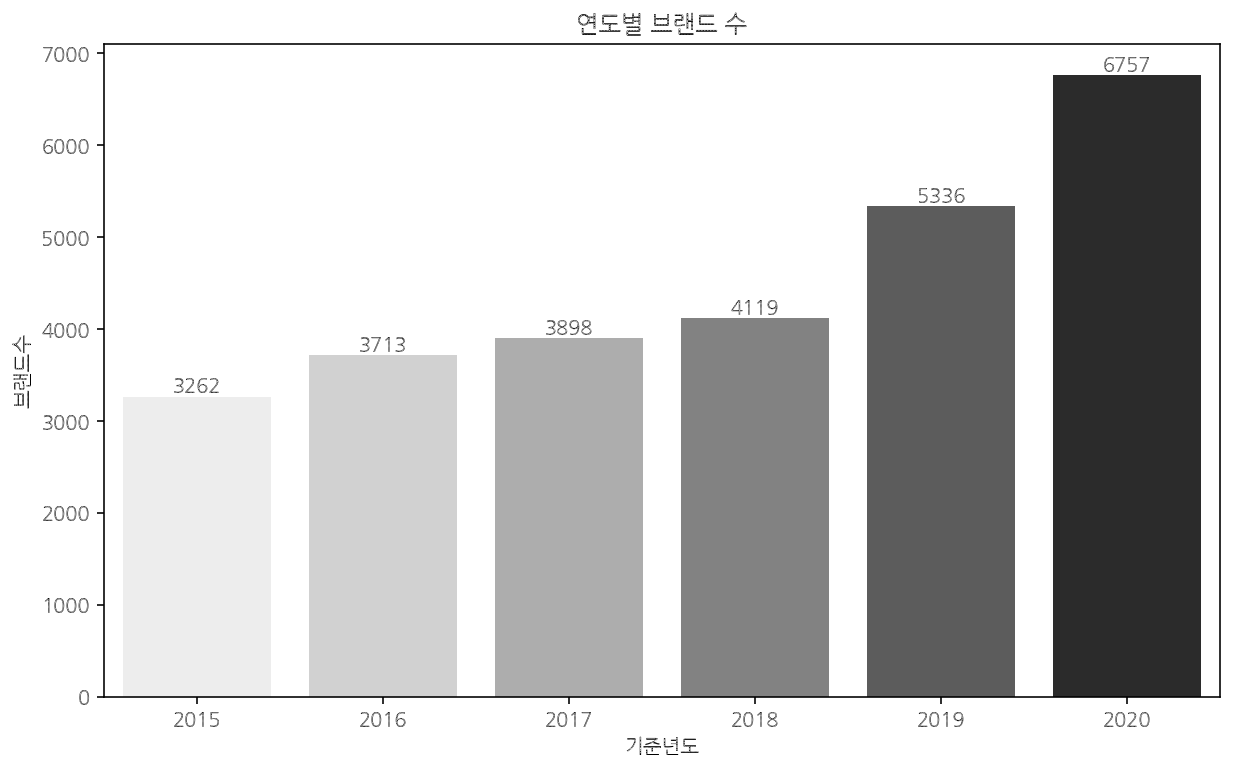

In [ ]:
# 전체 브랜드 수 확인
plt.figure(figsize=(10,6))
ax = sns.barplot(tmp['기준년도'], tmp['브랜드수'], palette='Greys')
plt.title('연도별 브랜드 수')

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [ ]:
# 연도별 가맹점 평균 매출액 0인 경우 확인
tmp = pd.DataFrame({'기준년도':[2020, 2019, 2018, 2017, 2016, 2015],
                   '브랜드수':[len(df[(df['가맹점수']==0) & (df['기준년도']==2020)]),len(df[(df['가맹점수']==0) & (df['기준년도']==2019)]),
                            len(df[(df['가맹점수']==0) & (df['기준년도']==2018)]),len(df[(df['가맹점수']==0) & (df['기준년도']==2017)]),
                            len(df[(df['가맹점수']==0) & (df['기준년도']==2016)]),len(df[(df['가맹점수']==0) & (df['기준년도']==2015)])]})
tmp

,기준년도,브랜드수
0,2020,2351
1,2019,1902
2,2018,1210
3,2017,1081
4,2016,1128
5,2015,945


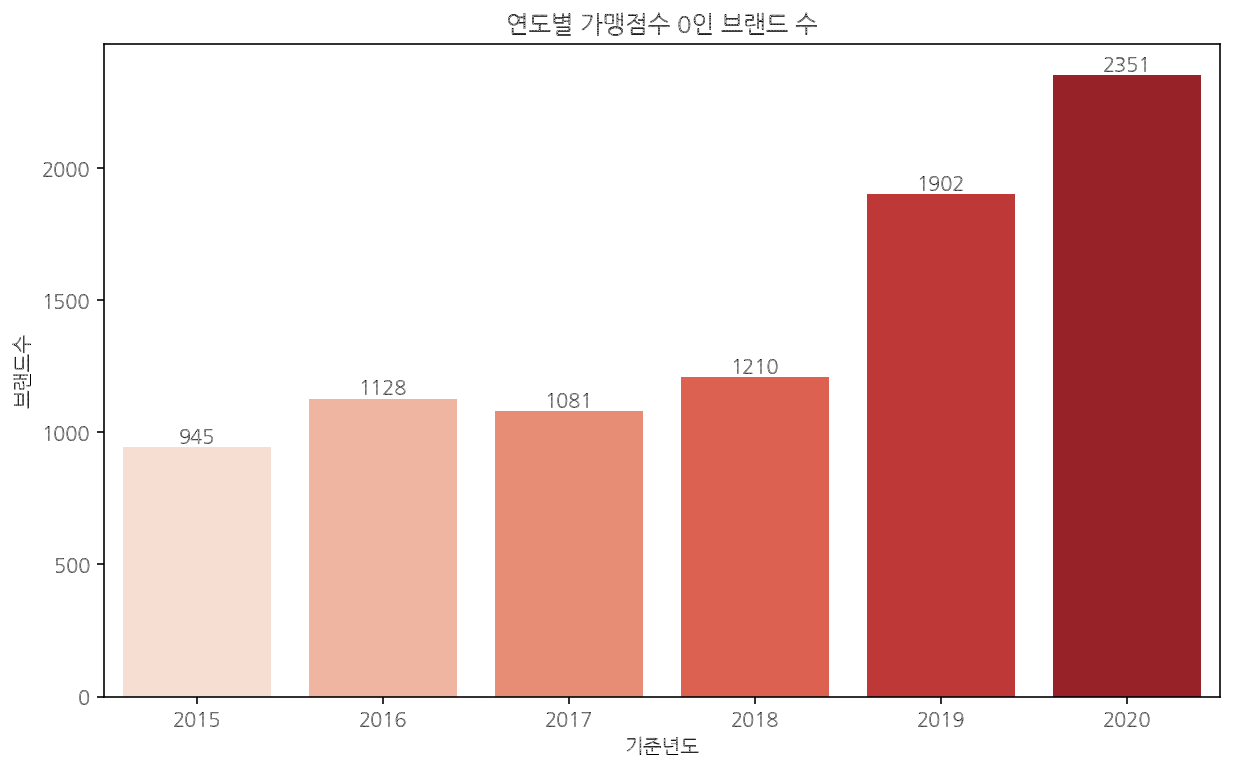

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.barplot(tmp['기준년도'], tmp['브랜드수'], palette='Reds')
plt.title('연도별 가맹점수 0인 브랜드 수')

for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

- 2019년부터 논의된 프랜차이즈 법 개정 전 프랜차이즈 등록하려는 업체 다수
> 가맹점 모집 전, 직영점 1년 운영 필수 [관련기사](https://m.hani.co.kr/arti/economy/economy_general/993329.html#cb)

#2. 추가 전처리

In [4]:
# 잘못 입력된 값 수정
df.loc[(df['브랜드']=='문토스트')&(df['기준년도']==2020),'기타비용']=52800
df.loc[(df['브랜드']=='문토스트')&(df['기준년도']==2020),'합계']=65700
df.loc[(df['브랜드']=='국수나무')&(df['기준년도']==2019),'면적당평균매출액']=13602
df.loc[(df['브랜드']=='반주(BANJOO)')&(df['기준년도']==2019),'영업이익']=1346267
df.loc[(df['브랜드']=='반주(BANJOO)')&(df['기준년도']==2019),'당기순이익']=419279
df.loc[(df['브랜드']=='사보텐')&(df['기준년도']==2019),'영업이익']=1346267
df.loc[(df['브랜드']=='사보텐')&(df['기준년도']==2019),'당기순이익']=419279

In [5]:
# 특성 추가
df['폐점'] = df['계약종료'] + df['계약해지']
df['폐업률'] = round(df['폐점']/df['가맹점수']*100,2)
df['폐업률'] = df['폐업률'].fillna(0)

In [6]:
# 가맹점수 0 제거
df = df[(df['가맹점수']>0)&(df['가맹점평균매출액']>0)&(df['가맹사업일수']>0)&(df['자산']!=0)]
df.shape

(8327, 36)

# 3. 2020년 데이터 분석

In [ ]:
ls = df[df['기준년도']==2020]['브랜드'].to_list()
ls[:5]

['오마뎅', '밀숲', '더오니기리플러스', '디저트39', '고래감자탕']

In [ ]:
df_2020 = pd.DataFrame()
for i in ls:
  tmp = df[df['브랜드'].str.contains(i)]
  df_2020 = pd.concat([df_2020,tmp])

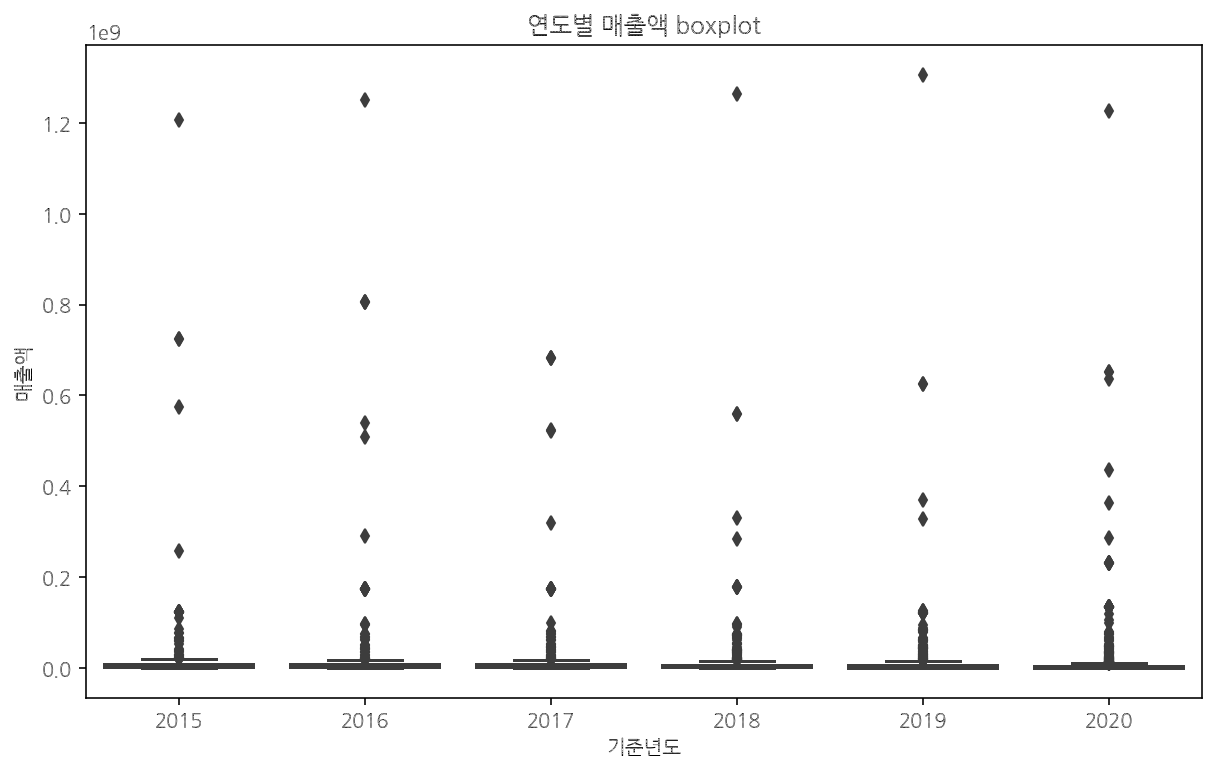

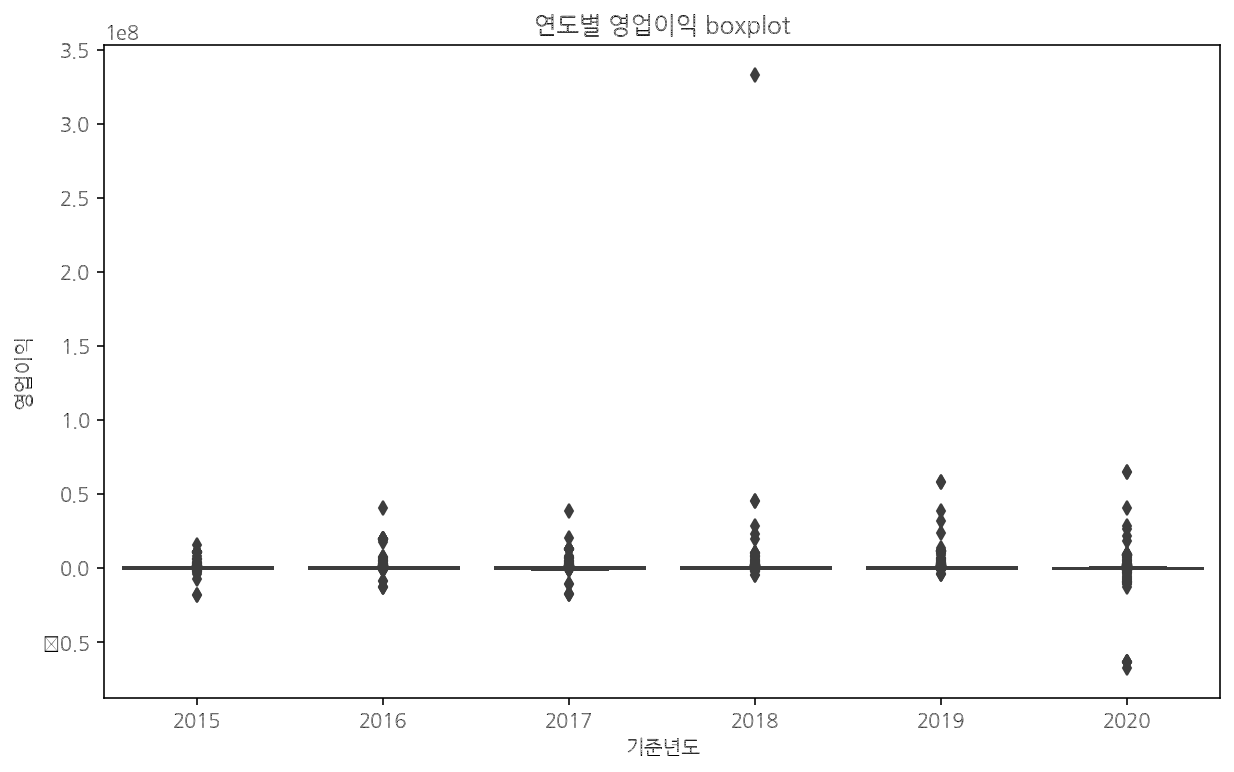

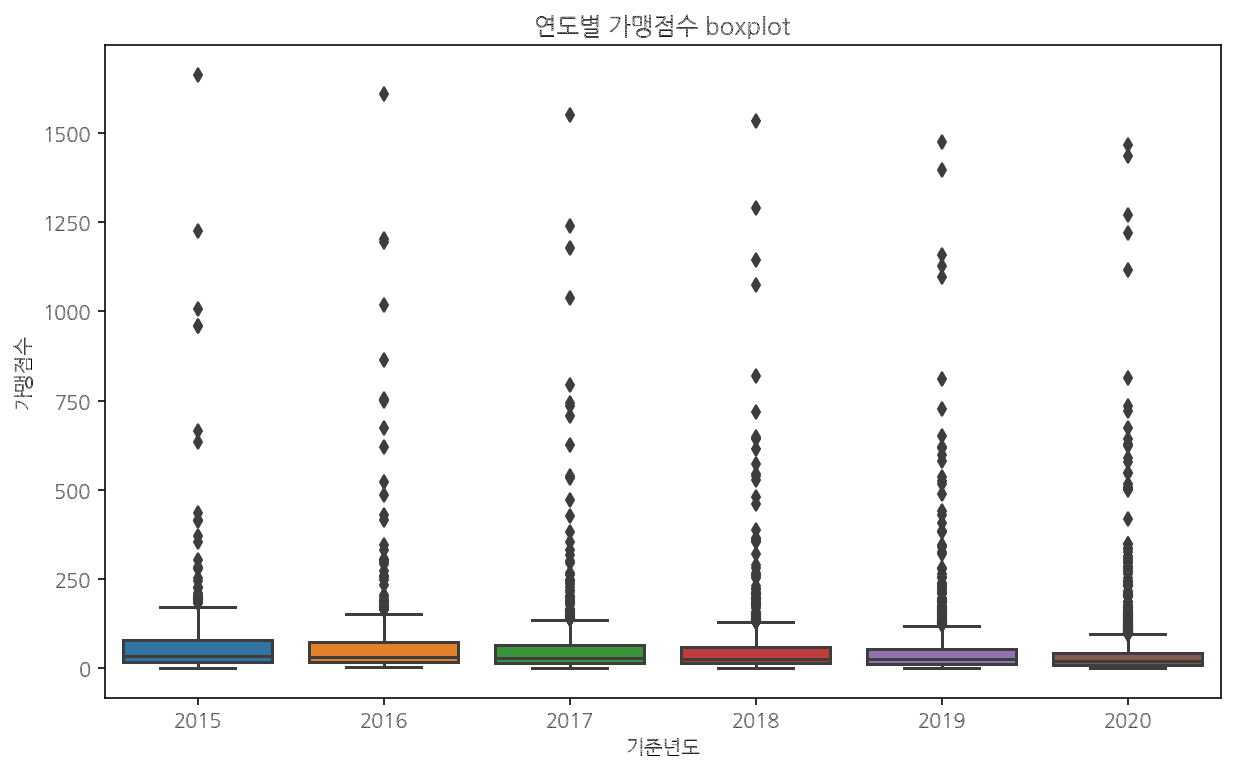

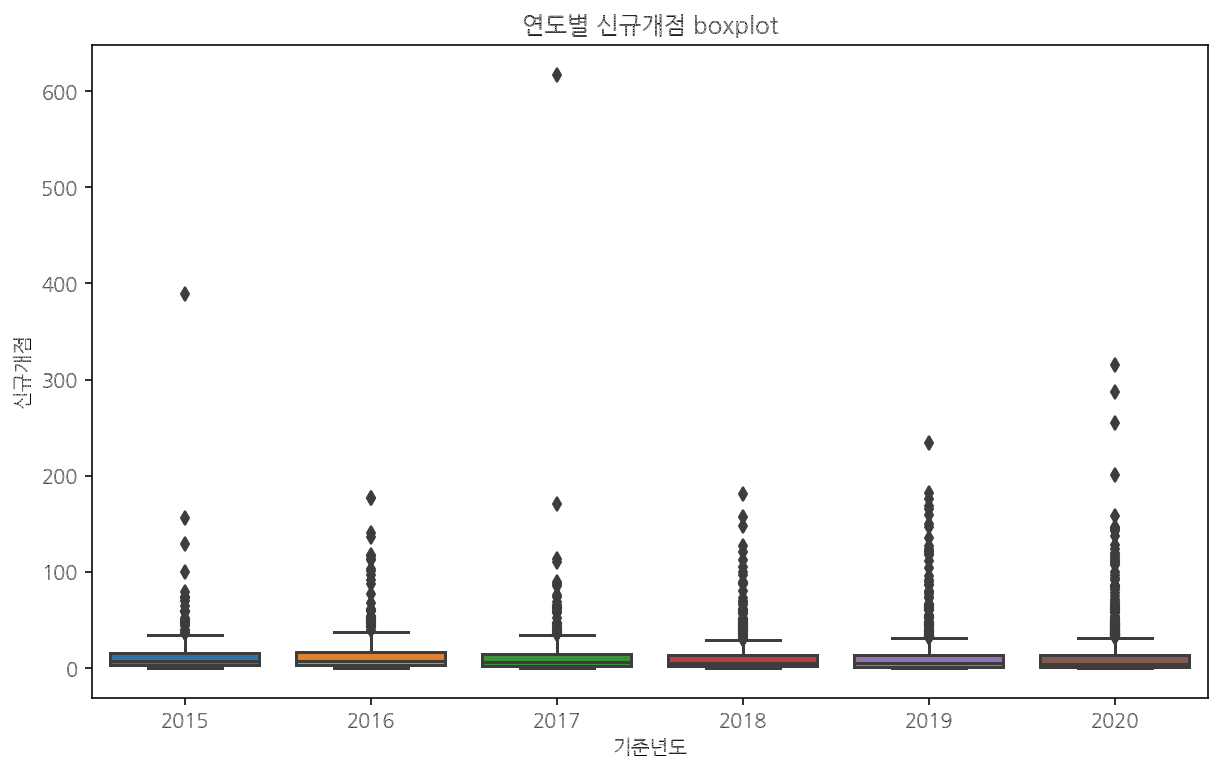

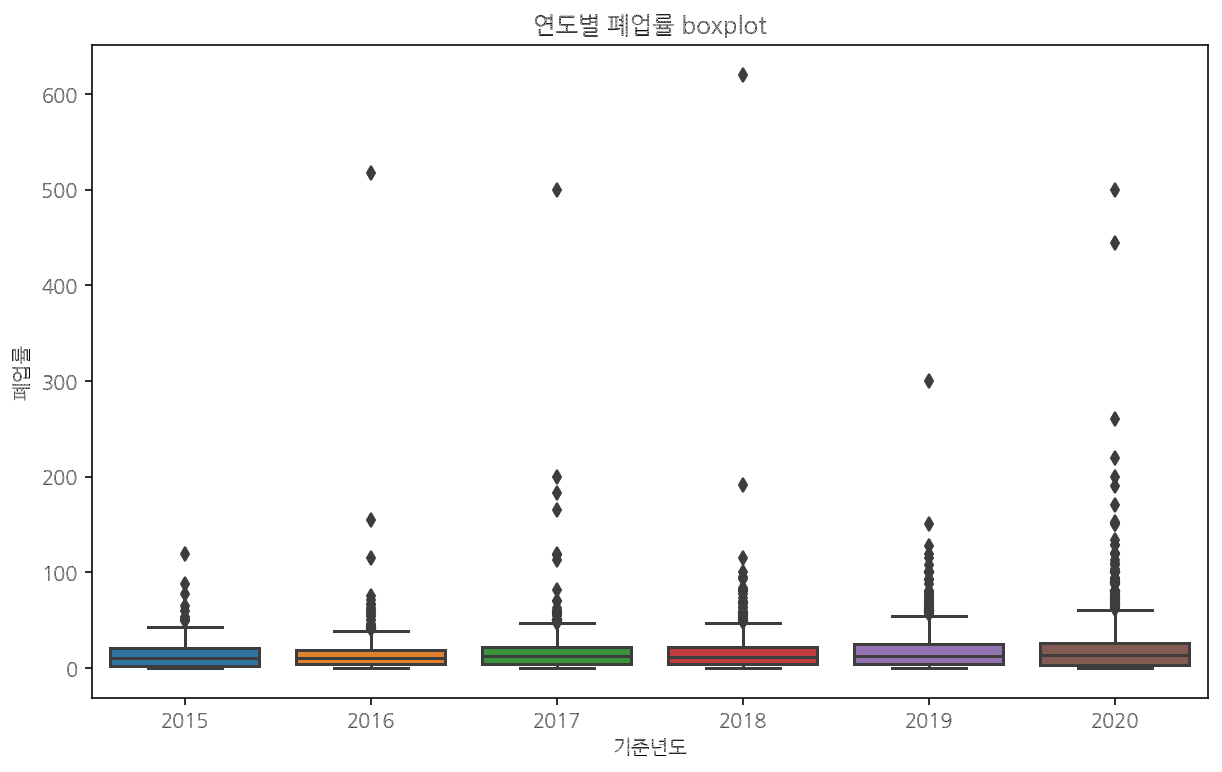

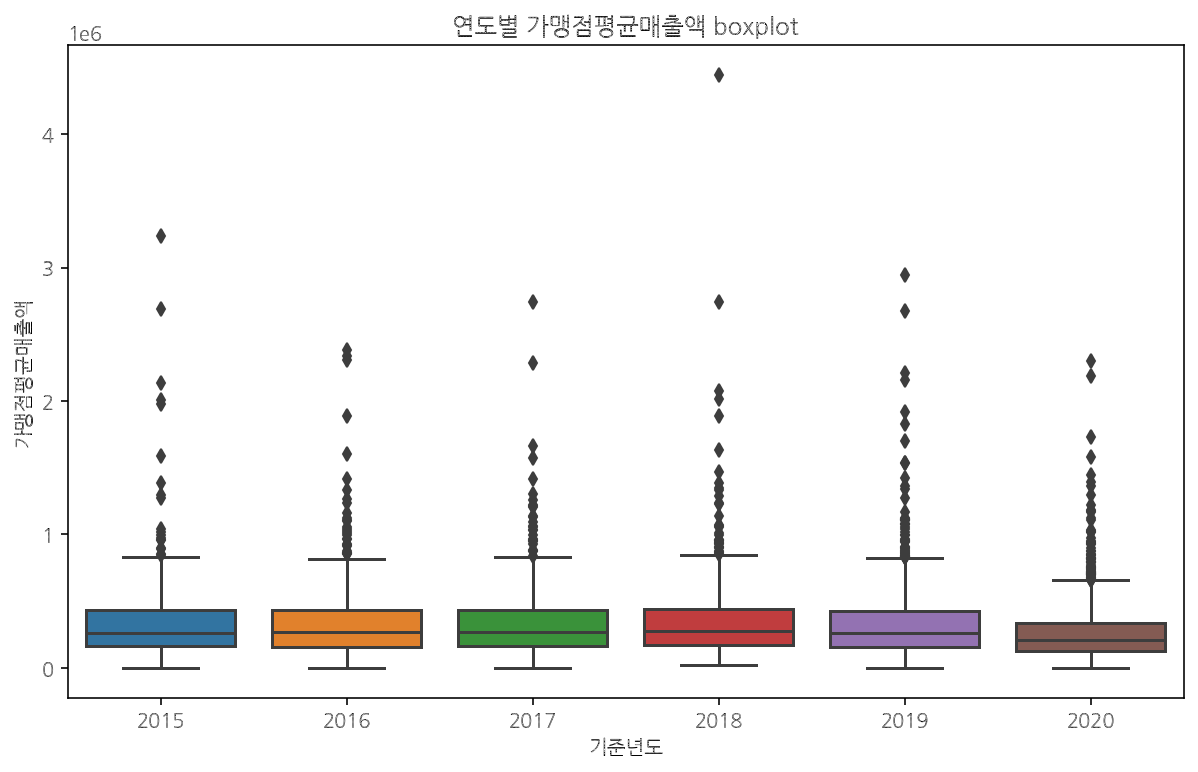

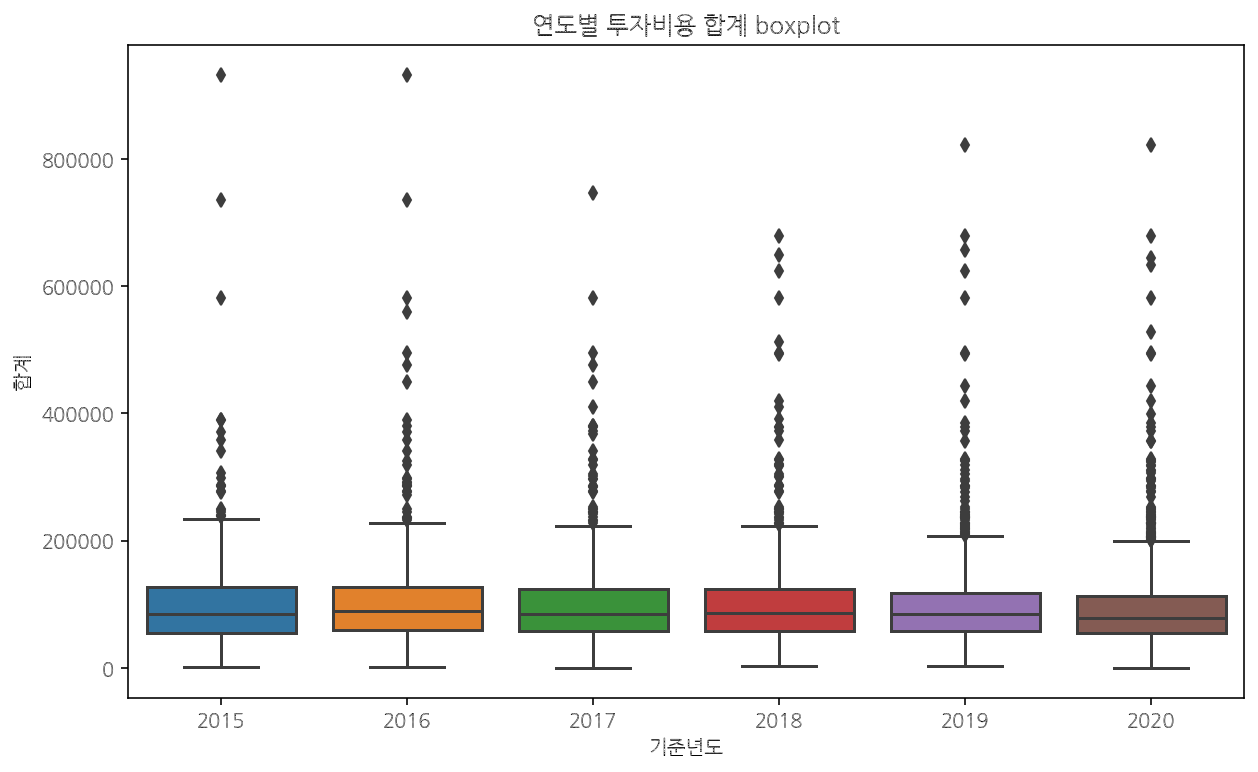

In [ ]:
# box plot 그리기
ax= plt.figure(1, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='매출액', data=df_2020)
plt.title('연도별 매출액 boxplot')

ax= plt.figure(2, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='영업이익', data=df_2020)
plt.title('연도별 영업이익 boxplot')

ax= plt.figure(3, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='가맹점수', data=df_2020)
plt.title('연도별 가맹점수 boxplot')

ax= plt.figure(4, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='신규개점', data=df_2020)
plt.title('연도별 신규개점 boxplot')

ax= plt.figure(5, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='폐업률', data=df_2020)
plt.title('연도별 폐업률 boxplot')

ax= plt.figure(6, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='가맹점평균매출액', data=df_2020)
plt.title('연도별 가맹점평균매출액 boxplot')

ax= plt.figure(7, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='합계', data=df_2020)
plt.title('연도별 투자비용 합계 boxplot');

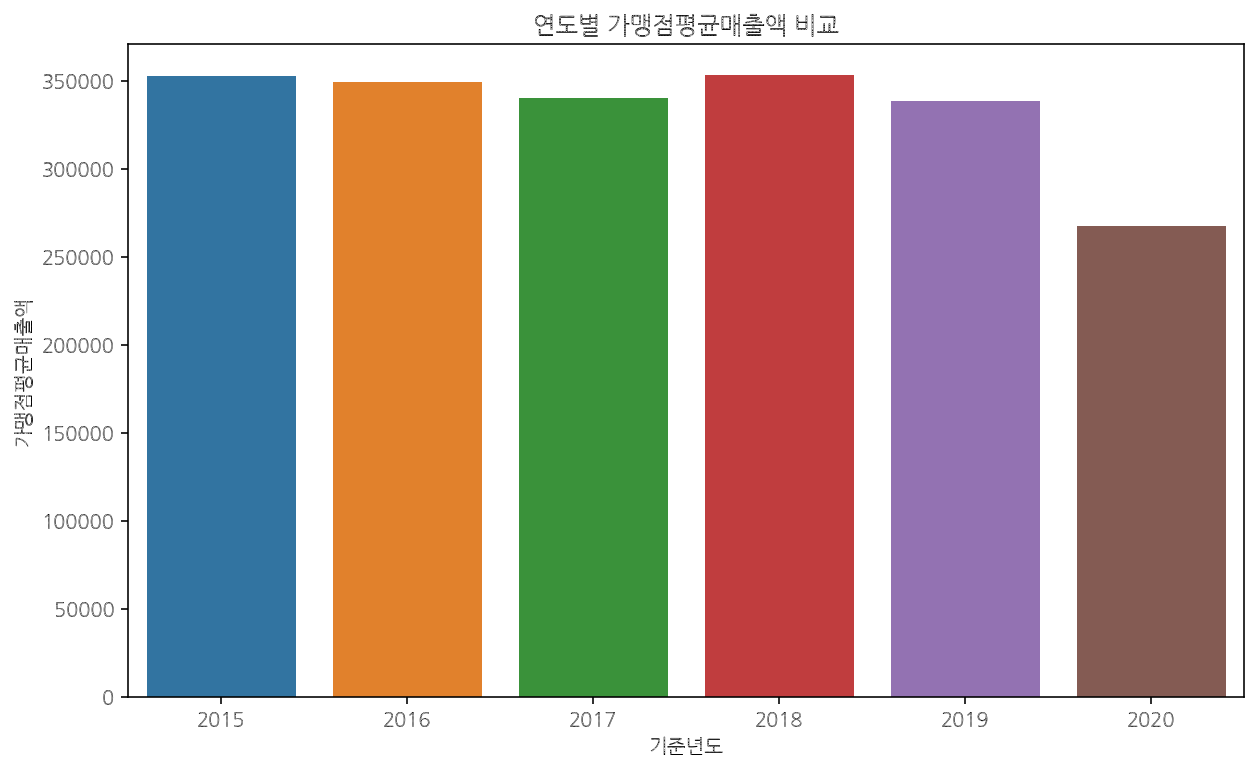

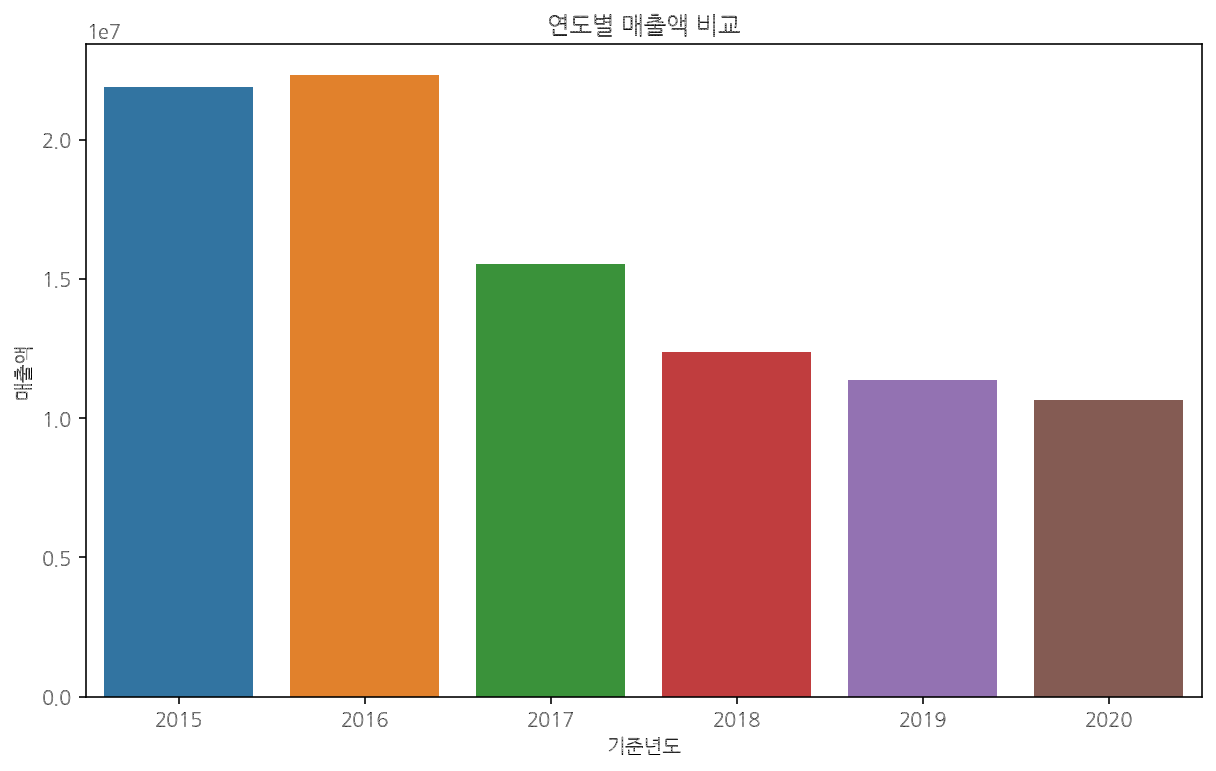

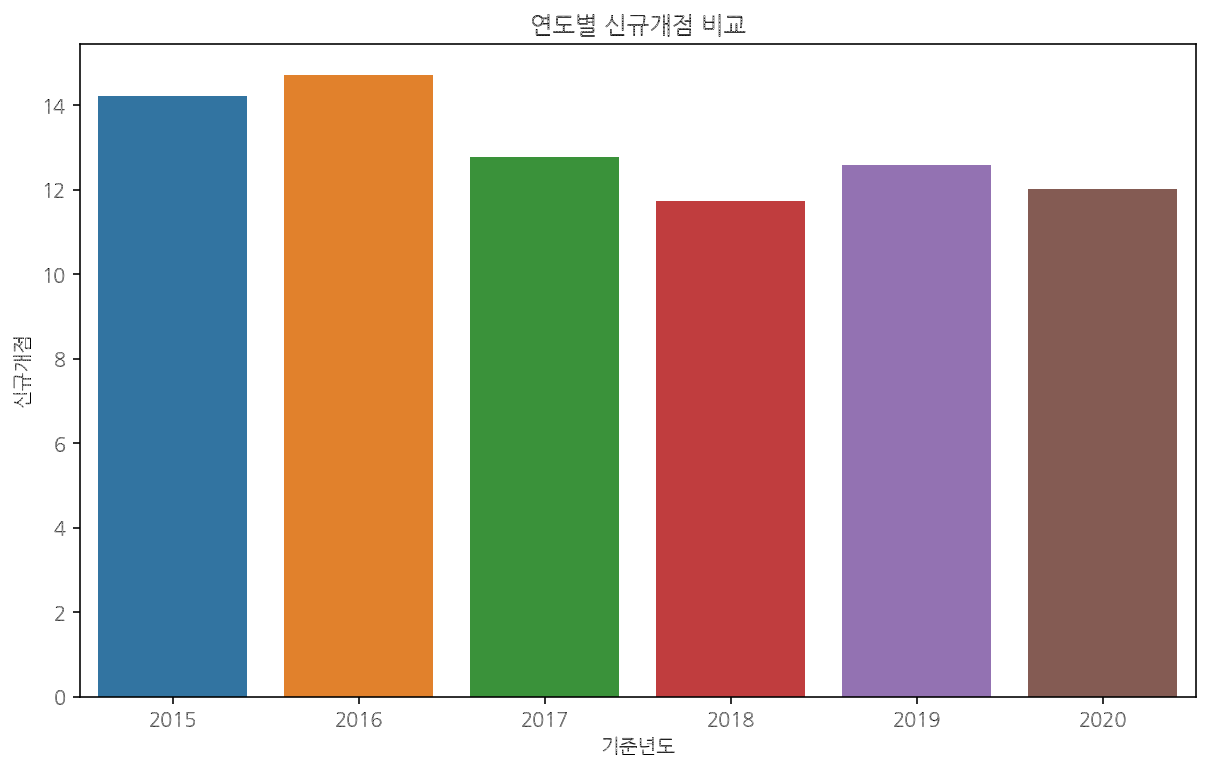

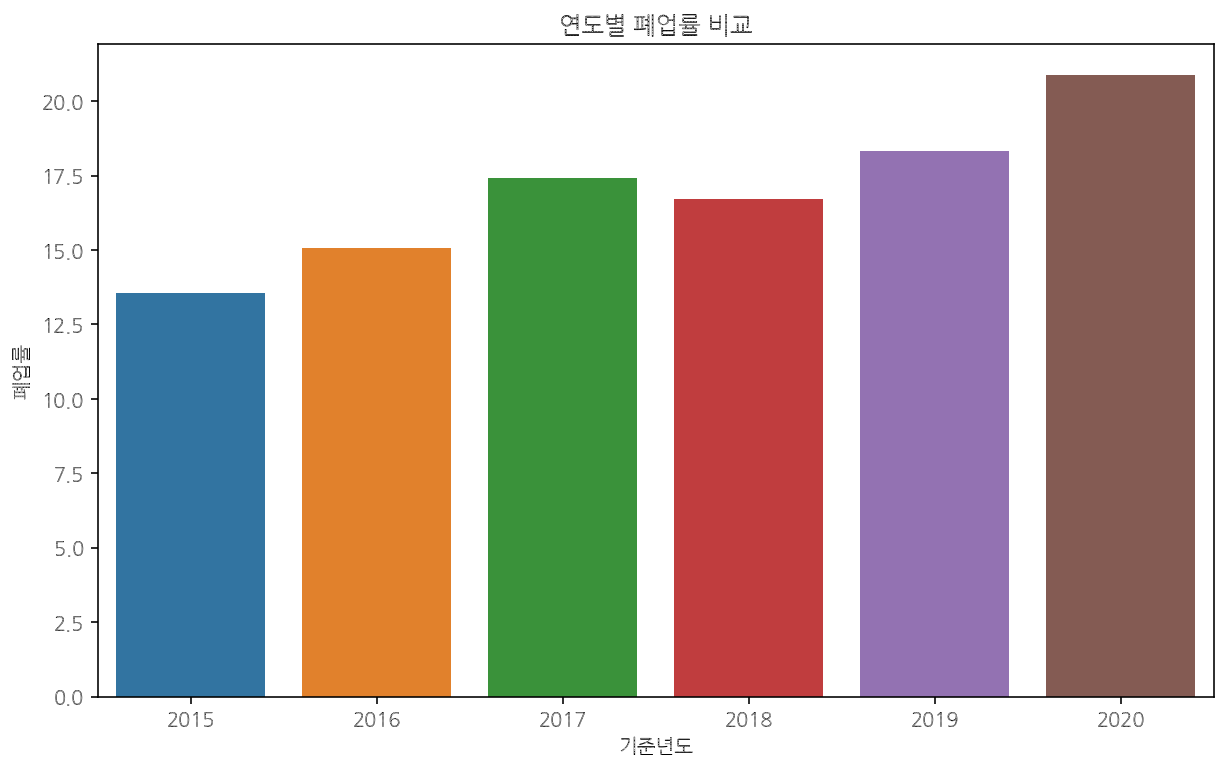

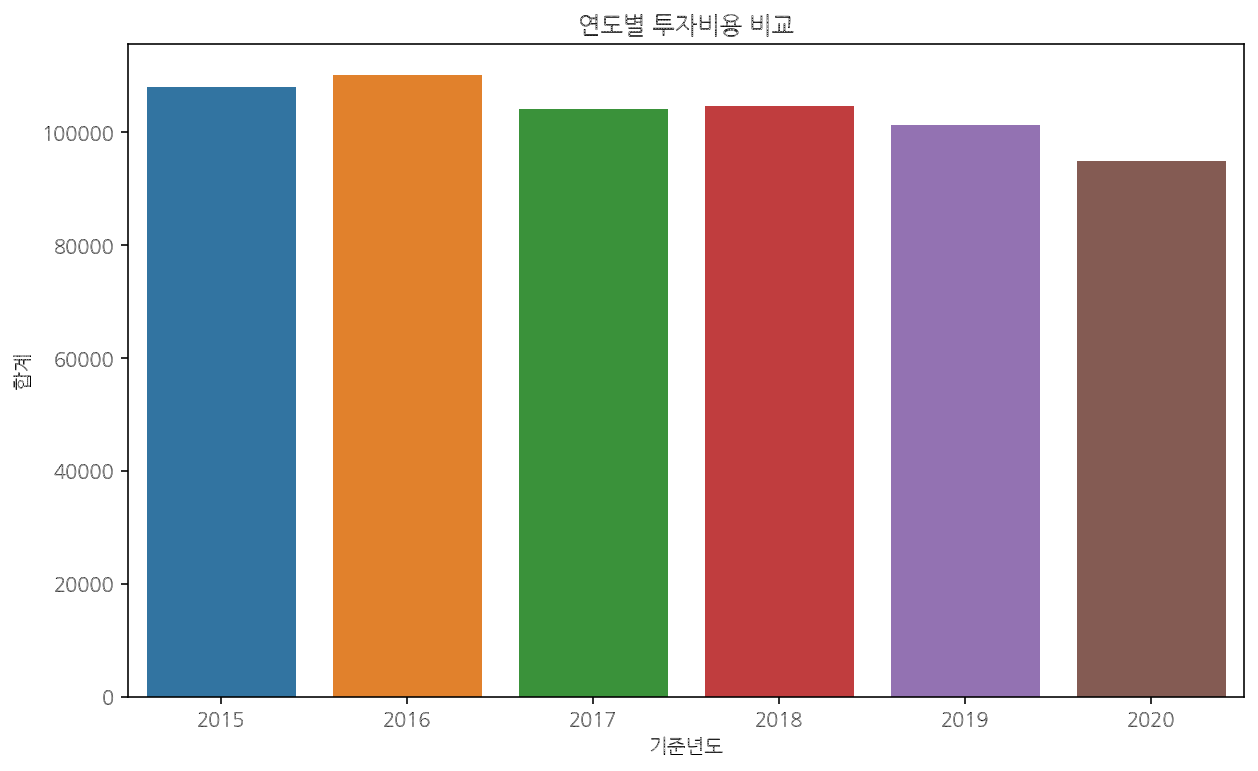

In [ ]:
# bar plot 그리기
ax= plt.figure(1, figsize = (10, 6)) 
sns.barplot(x='기준년도', y='가맹점평균매출액', data=df_2020.groupby('기준년도').mean().reset_index())
plt.title('연도별 가맹점평균매출액 비교')

ax= plt.figure(2, figsize = (10, 6)) 
sns.barplot(x='기준년도', y='매출액', data=df_2020.groupby('기준년도').mean().reset_index())
plt.title('연도별 매출액 비교')

ax= plt.figure(3, figsize = (10, 6)) 
sns.barplot(x='기준년도', y='신규개점', data=df_2020.groupby('기준년도').mean().reset_index())
plt.title('연도별 신규개점 비교')

ax= plt.figure(4, figsize = (10, 6)) 
sns.barplot(x='기준년도', y='폐업률', data=df_2020.groupby('기준년도').mean().reset_index())
plt.title('연도별 폐업률 비교')

ax= plt.figure(5, figsize = (10, 6)) 
sns.barplot(x='기준년도', y='합계', data=df_2020.groupby('기준년도').mean().reset_index())
plt.title('연도별 투자비용 비교');

- 2020년 데이터가 입력되지 않은 기업이 다수 존재하므로 EDA에는 2020년 데이터를 사용하지 않기로 결정

#4. ~2019년 데이터 분석

In [7]:
df = df.drop(df[df['기준년도']==2020].index)
df.shape

(7014, 36)

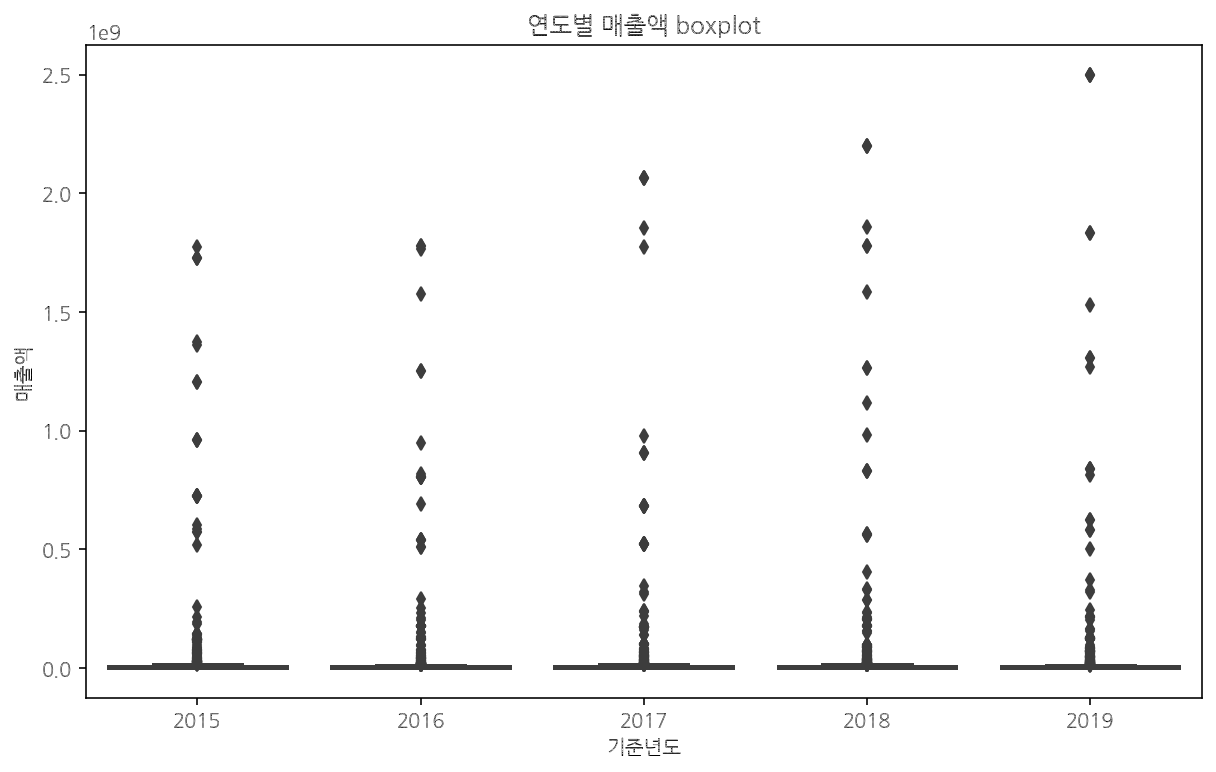

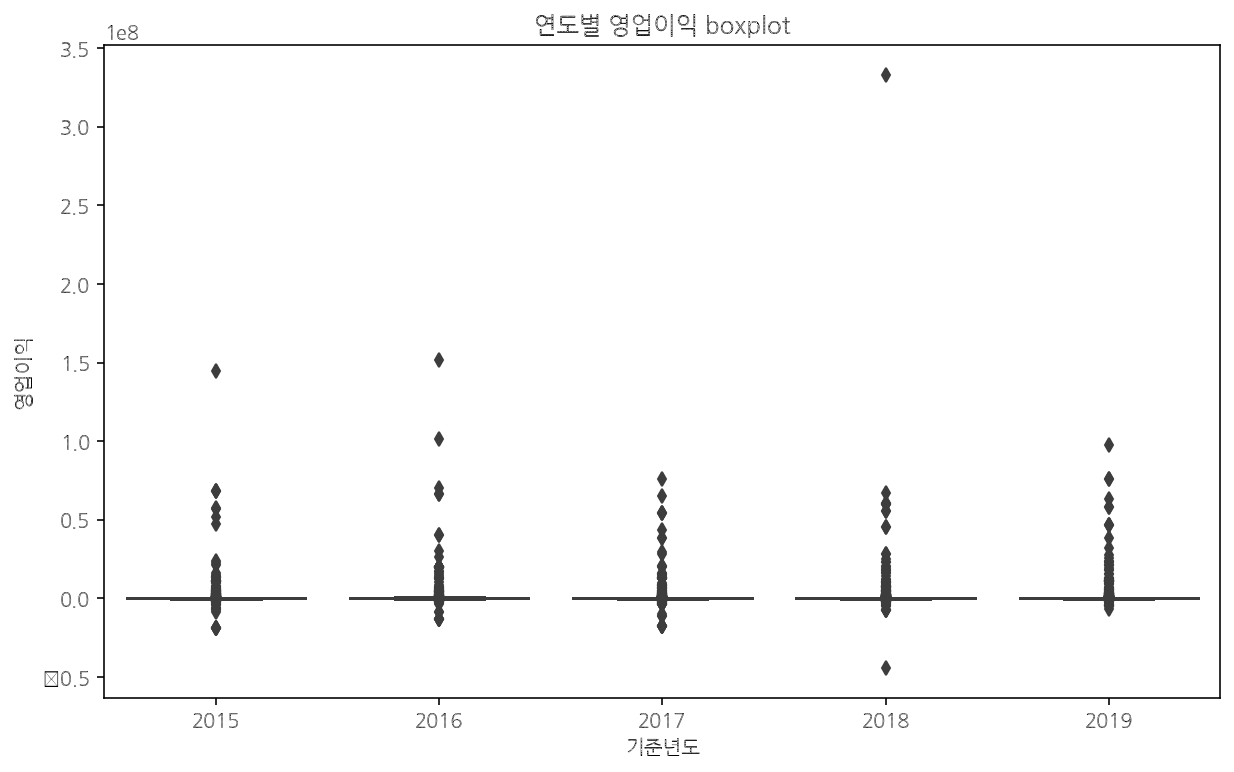

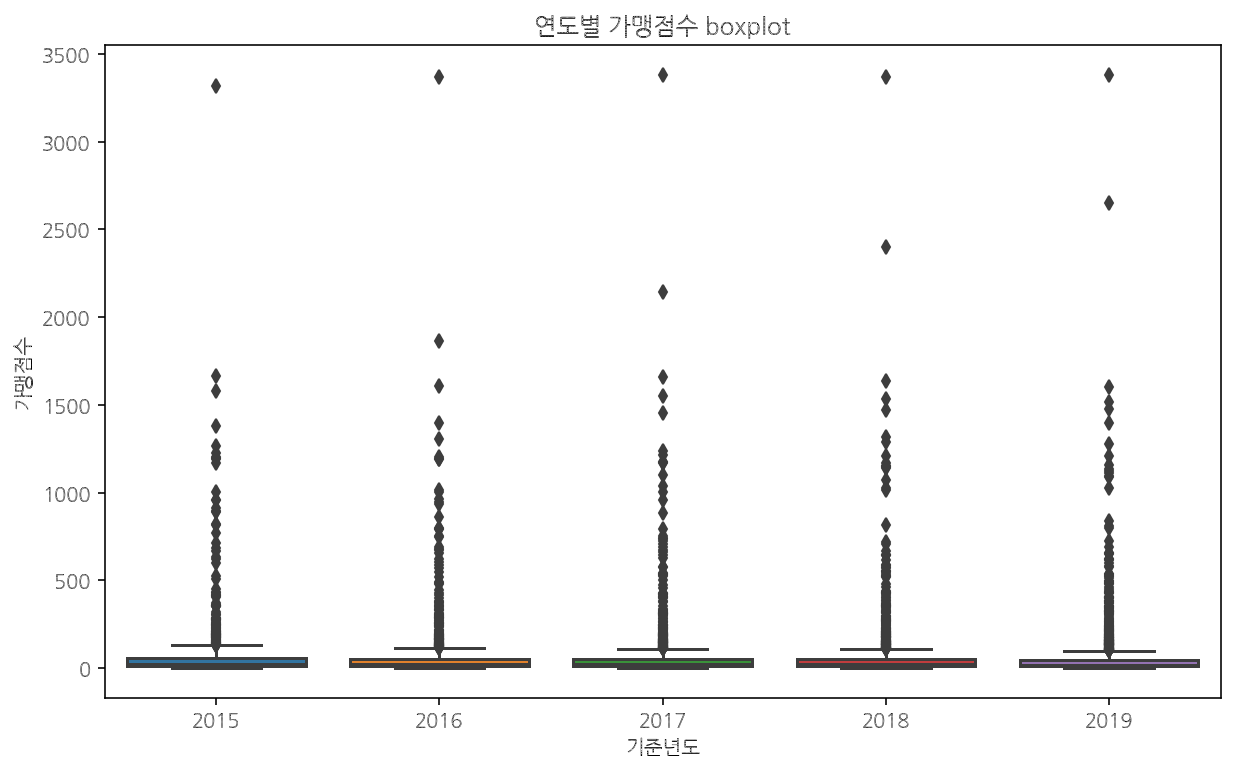

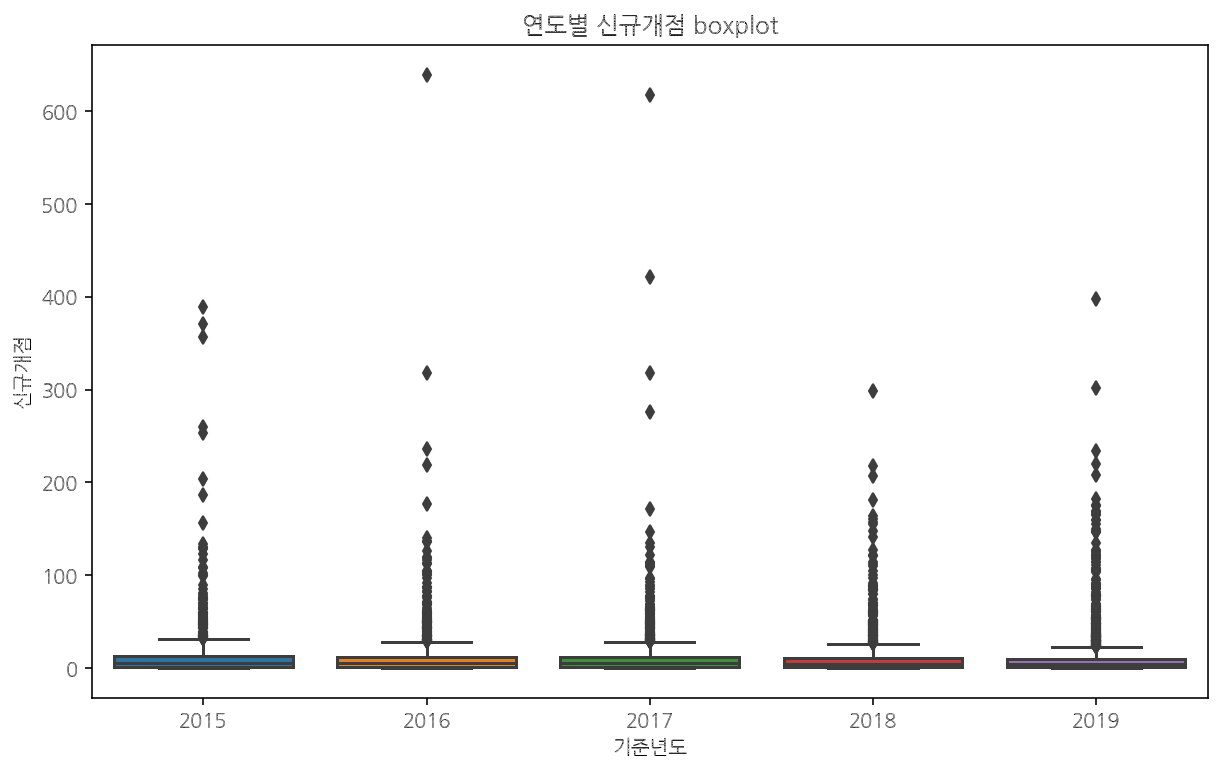

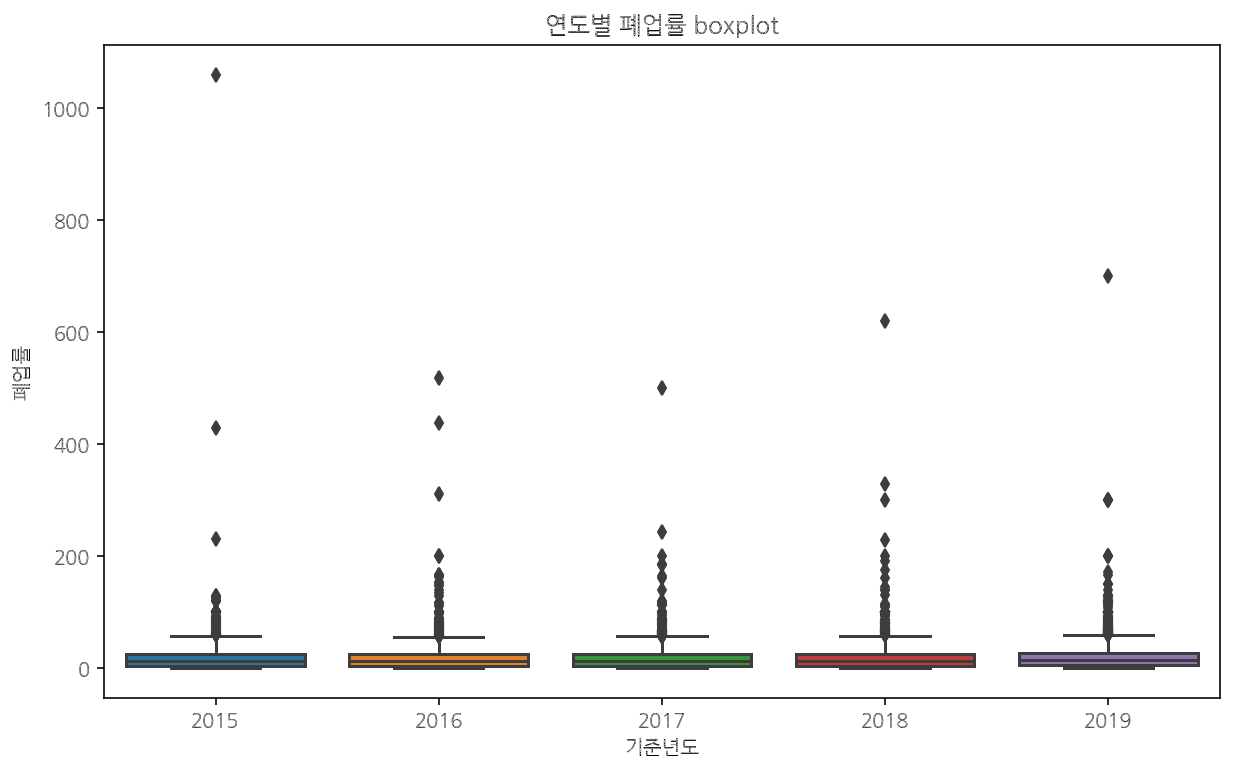

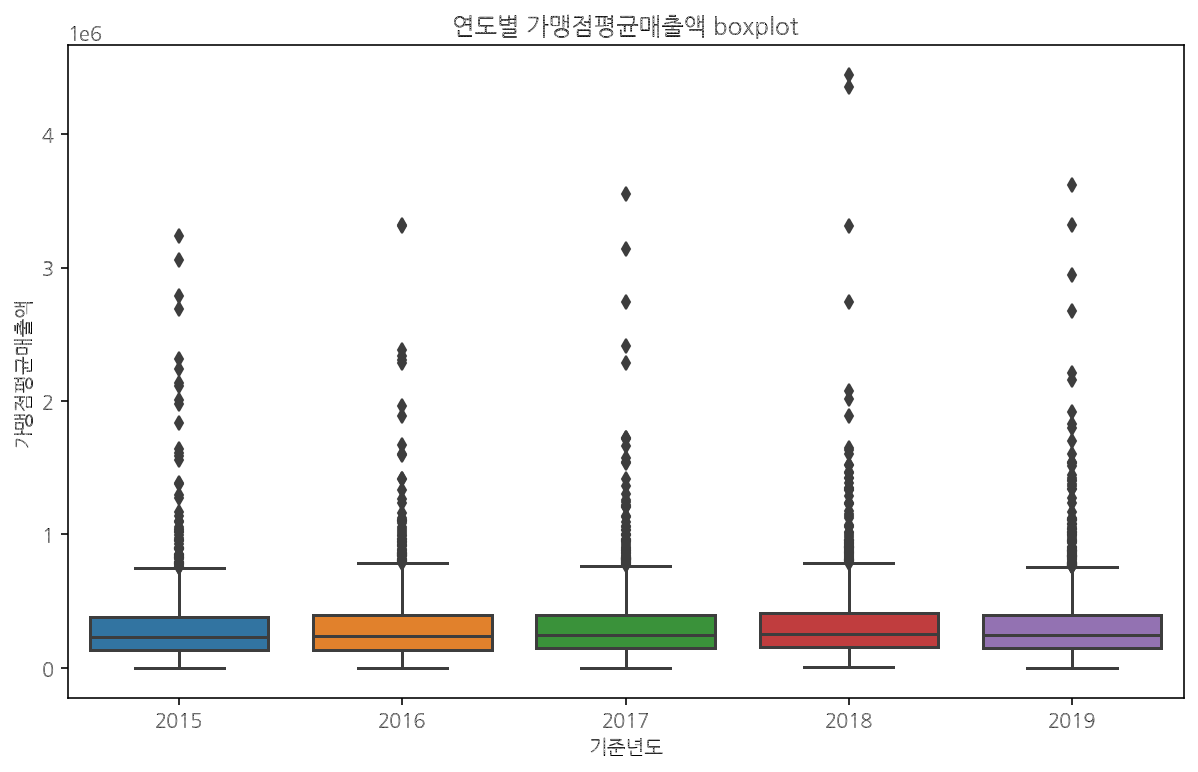

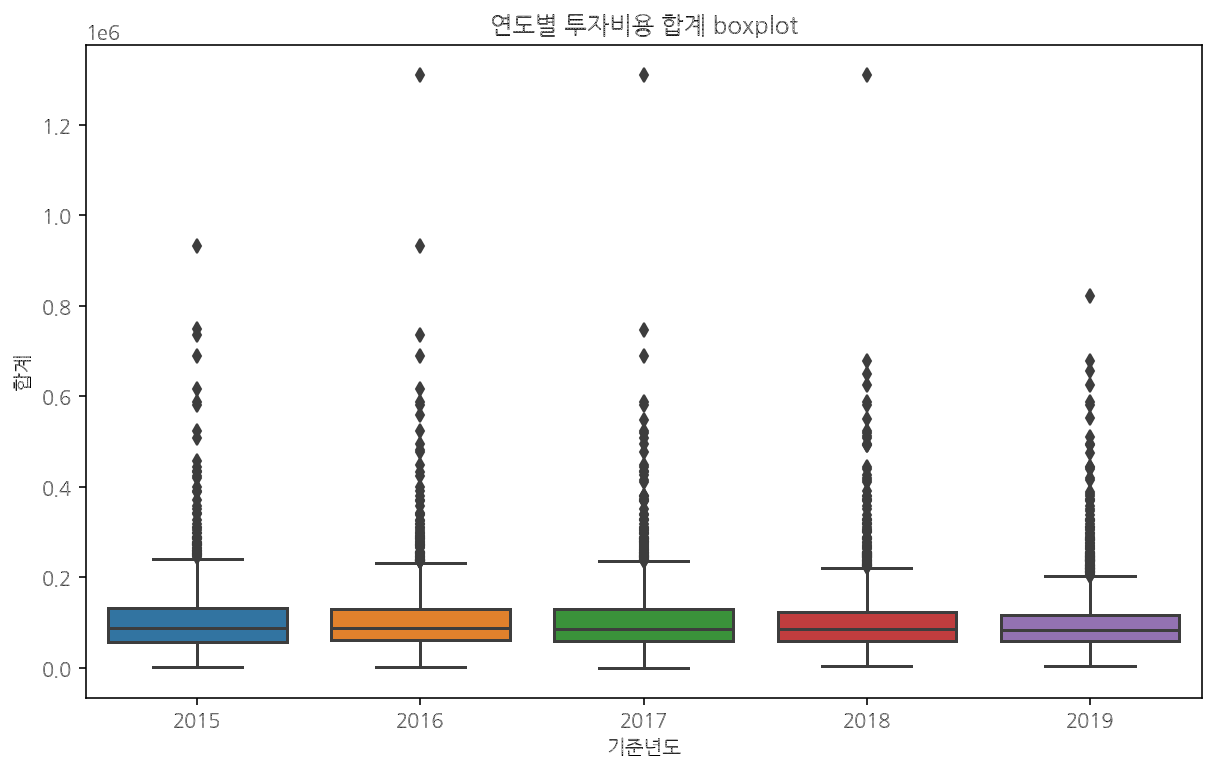

In [8]:
# box plot 그리기
ax= plt.figure(1, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='매출액', data=df)
plt.title('연도별 매출액 boxplot')

ax= plt.figure(2, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='영업이익', data=df)
plt.title('연도별 영업이익 boxplot')

ax= plt.figure(3, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='가맹점수', data=df)
plt.title('연도별 가맹점수 boxplot')

ax= plt.figure(4, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='신규개점', data=df)
plt.title('연도별 신규개점 boxplot')

ax= plt.figure(5, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='폐업률', data=df)
plt.title('연도별 폐업률 boxplot')

ax= plt.figure(6, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='가맹점평균매출액', data=df)
plt.title('연도별 가맹점평균매출액 boxplot')

ax= plt.figure(7, figsize = (10, 6)) 
sns.boxplot(x='기준년도', y='합계', data=df)
plt.title('연도별 투자비용 합계 boxplot');

In [9]:
# 업종 encoding
mapper = {'커피':1, '피자':2, '치킨':3, '제과제빵':4, '음료(커피외)':5, '기타외식':6, '기타외국식':7, '한식':8, '중식':9, 
                '일식':10, '주점':11, '분식':12, '아이스크림/빙수':13, '서양식':14, '패스트푸드':15}
df["업종_enc"] = df["업종"].replace(mapper)

# 상관관계
cor=df[['브랜드', '상호', '업종_enc', '가맹사업일수', '가맹점수', '가맹본부임직원수',
       '신규개점', '명의변경', '폐업률', '가맹점평균매출액', '면적당평균매출액', '가맹비', '교육비',
       '보증금', '합계', '총인테리어비용', '자산', '자본','부채', '매출액', '영업이익', 
        '당기순이익', '법위반횟수']].corr()

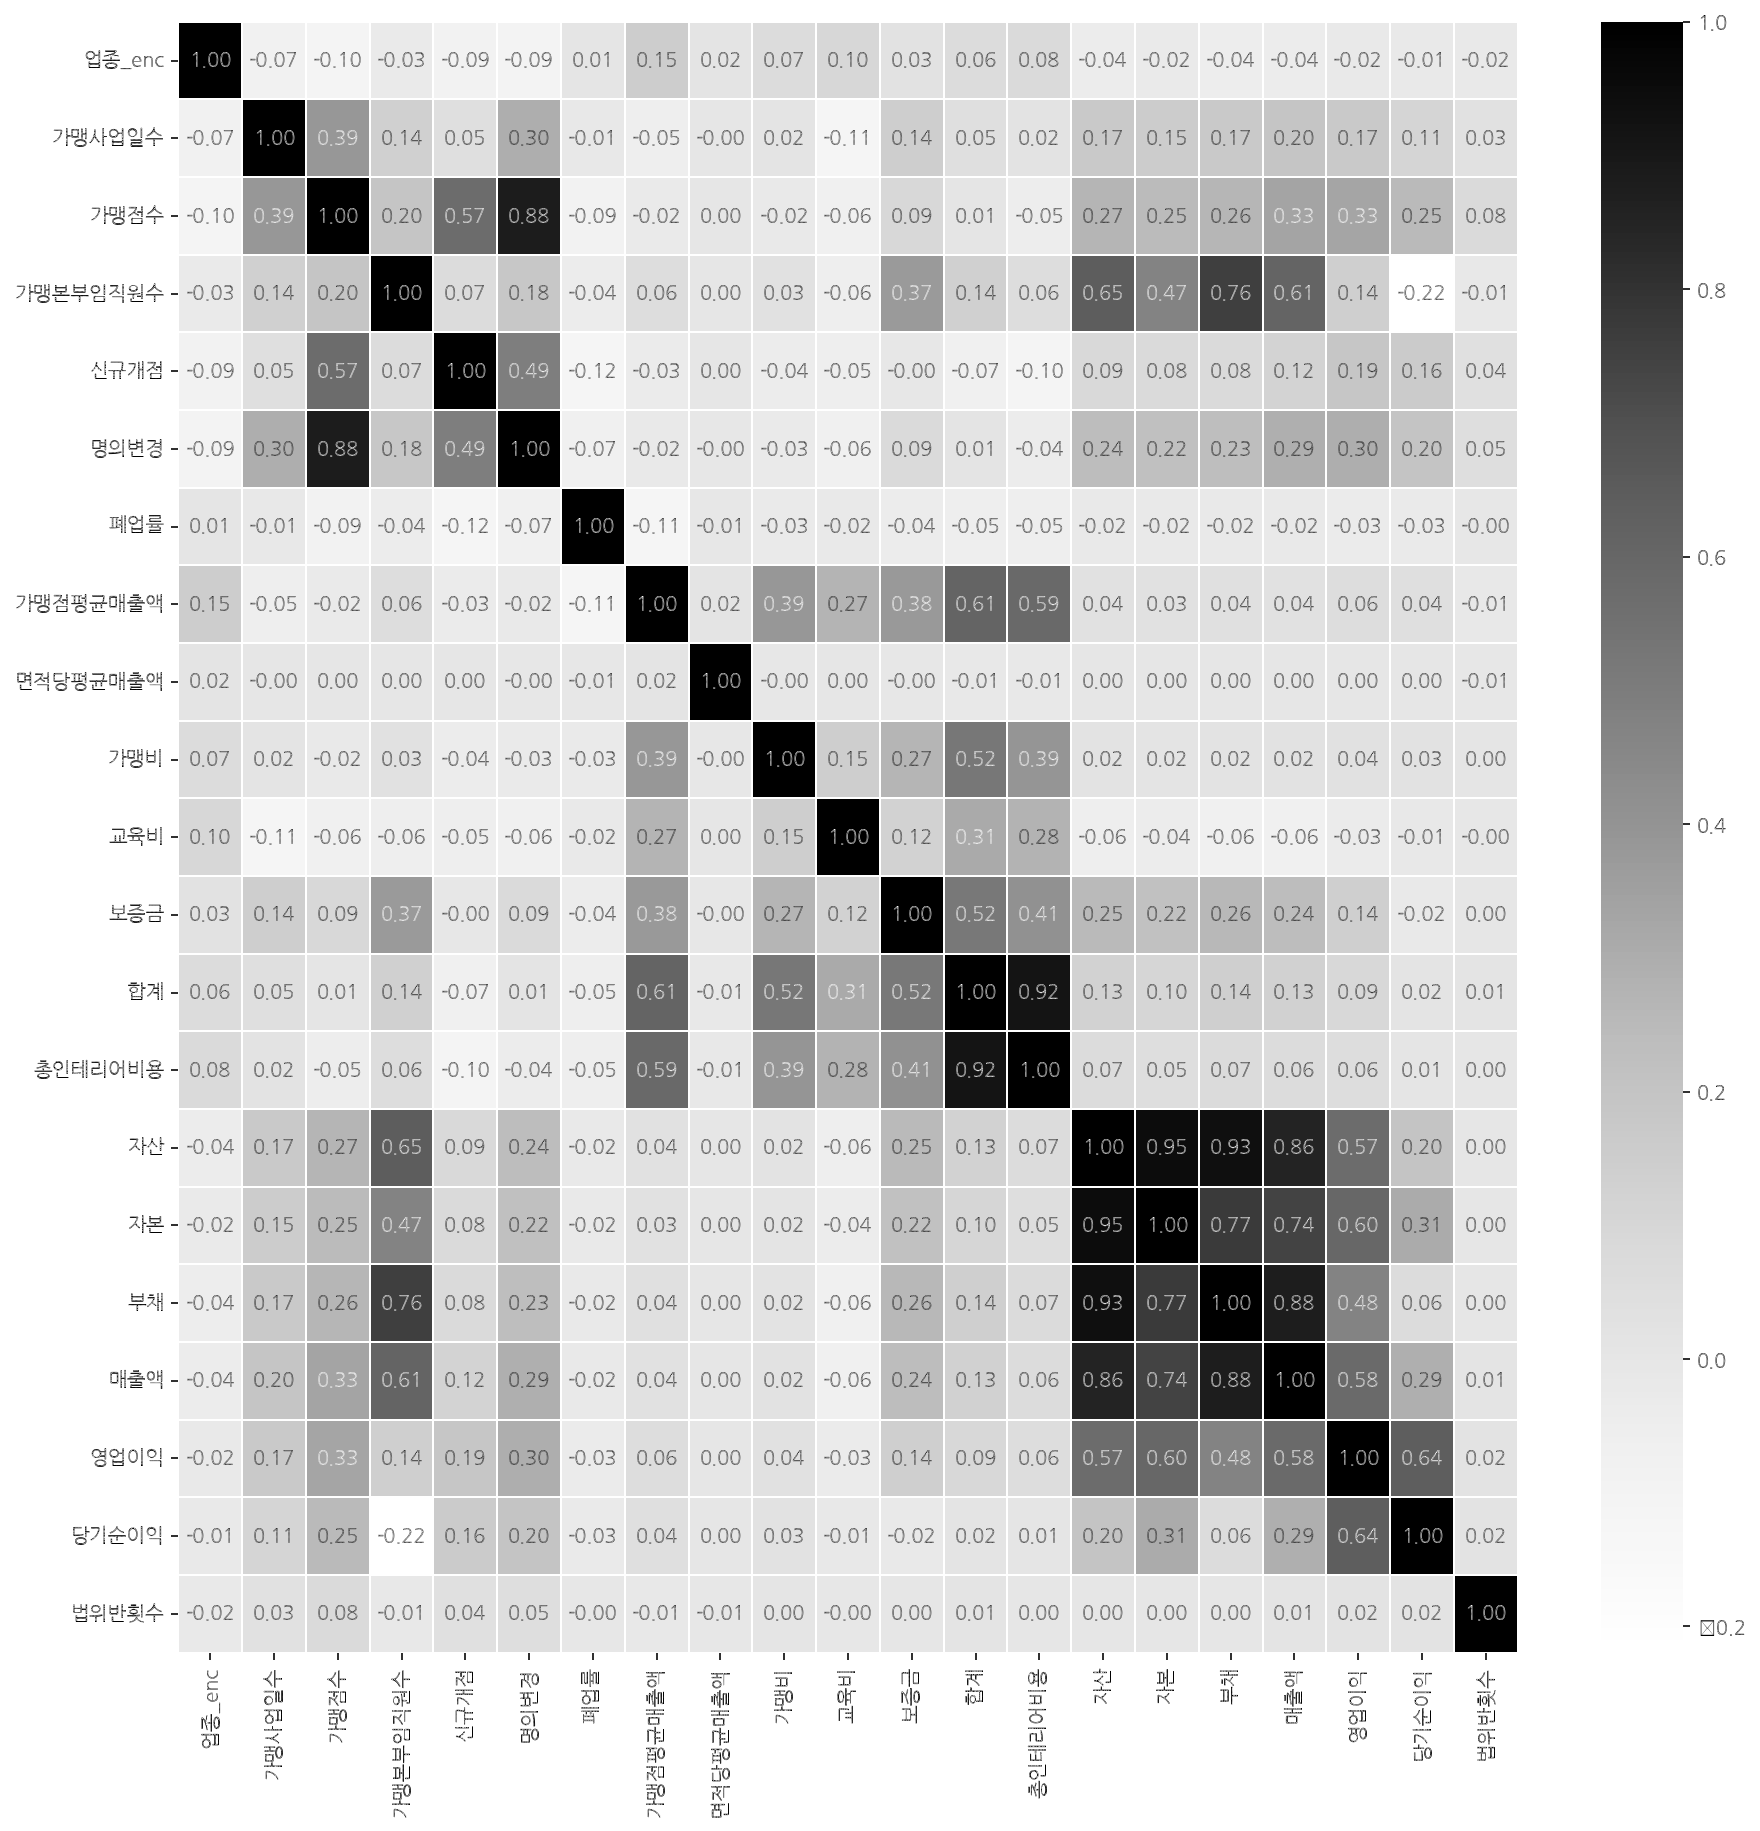

In [10]:
# 상관관계 확인
plt.figure(figsize=(15,15))
sns.heatmap(data = cor, annot=True, fmt = '.2f', linewidths=.5, cmap='Greys');

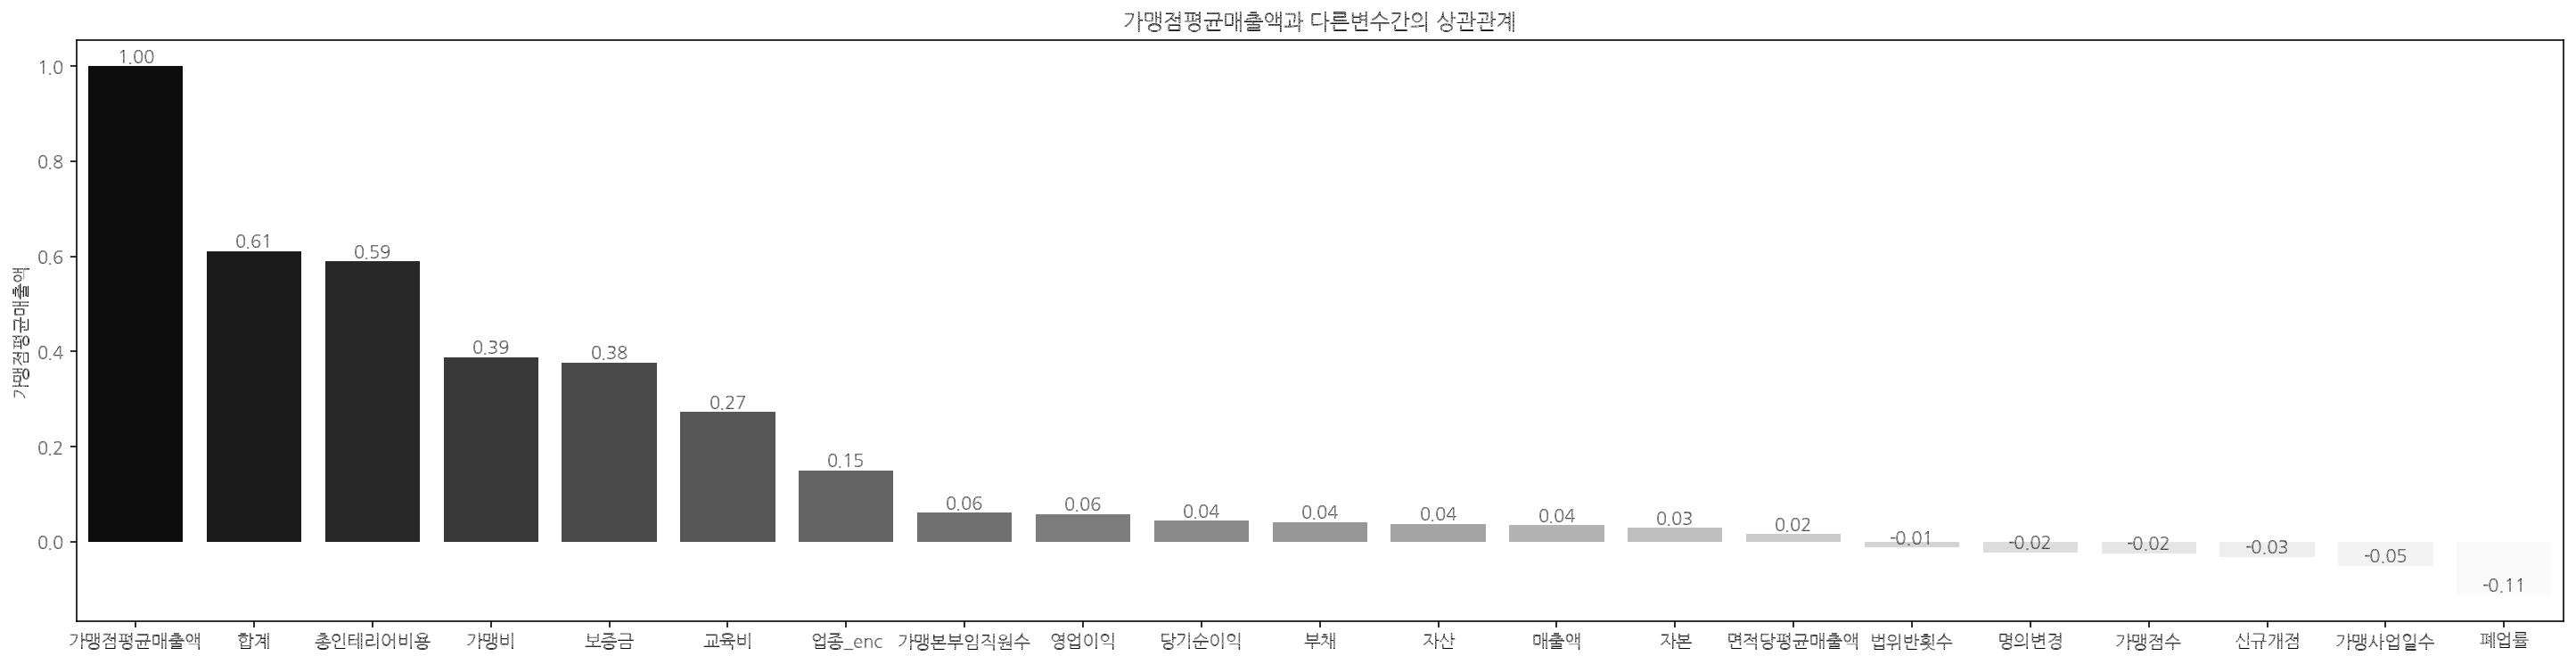

In [11]:
# 가맹점평균매출액과의 상관관계 확인
plt.figure(figsize = (25, 6)) 
ax = sns.barplot(cor['가맹점평균매출액'].index, cor['가맹점평균매출액'], order=cor.sort_values('가맹점평균매출액', ascending=False).index, palette='Greys_r')
plt.title('가맹점평균매출액과 다른변수간의 상관관계')
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points');

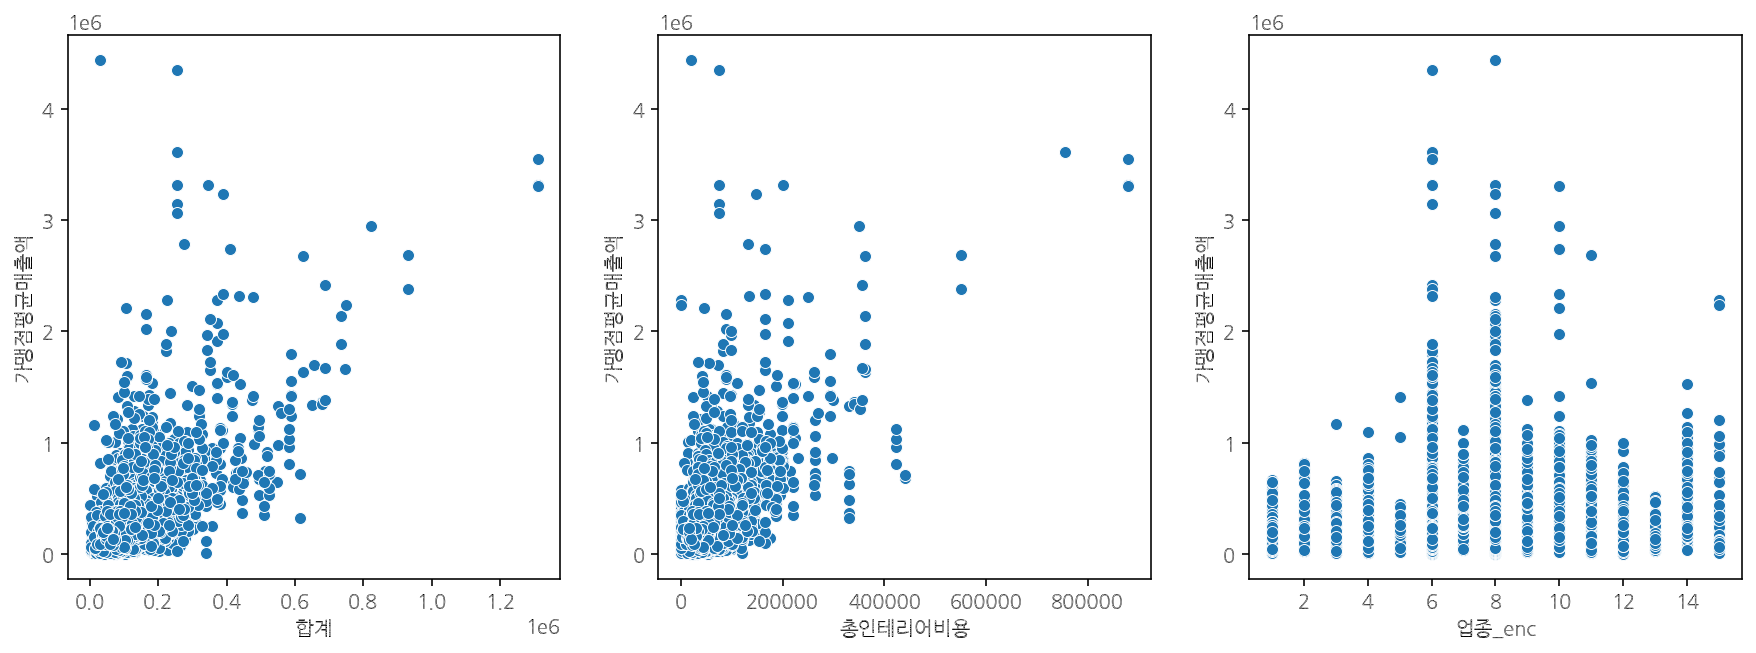

In [17]:
fig, ax = plt.subplots(ncols=3,figsize=(15,5))

sns.scatterplot('합계', '가맹점평균매출액', data=df, ax=ax[0])
sns.scatterplot('총인테리어비용', '가맹점평균매출액', data=df, ax=ax[1])
sns.scatterplot('업종_enc', '가맹점평균매출액', data=df, ax=ax[2]);

- 가맹점 평균 매출액과 가장 큰 상관관계를 가지는 변수는 총 투자비용 합계이며, 업종과의 상관계수가 0.15이지만 시각화 한 결과, 특별한 상관관계는 보이지 않는다.

##1) 연도별 분석

In [ ]:
year = df.groupby('기준년도').mean().reset_index()
year

,기준년도,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc
0,2015,2369.492126,74.763780,205.574803,13.009843,3.058071,5.959646,6.018701,315351.902559,306.950787,8763.211614,2872.436024,3879.625984,93345.190945,108860.464567,1813.174213,90.286417,50313.488189,2.717516e+07,1.255636e+07,1.461880e+07,3.219969e+07,9.975014e+05,396896.123031,0.146654,-354.666024,15.659045,-1.122667,-1.489911,48.018278,9.017717,19.014114,6.995079
1,2016,2343.057304,67.640839,184.076675,12.073446,2.457627,5.938660,5.079096,311782.920097,11716.151735,8928.150121,3109.144471,3875.706215,92681.284100,108594.284907,1873.080710,86.771590,49885.182405,2.076192e+07,9.586741e+06,1.121296e+07,2.509779e+07,9.831005e+05,278906.284907,0.009685,322.401703,15.674512,-30.517845,-28.513914,26.158959,8.396287,20.099887,6.834544
2,2017,2409.706600,67.701578,120.834290,11.653515,2.074605,6.093257,4.862267,317227.834290,17438.412482,8683.266141,3287.263271,3797.202296,90880.465567,106648.197274,1856.605452,95.045911,48810.370875,1.793513e+07,8.613680e+06,9.490575e+06,2.509924e+07,7.092919e+05,280317.906026,0.007891,-34.151973,17.576836,-38.122260,-4.302245,48.796363,8.167862,18.878494,6.905308
3,2018,2422.636480,65.511480,83.144770,10.718750,2.183673,5.452806,4.473852,327652.247449,15554.914541,8820.499362,3447.373087,3469.068878,88740.873724,104477.815051,1844.692602,98.771684,47592.017857,1.642849e+07,8.365330e+06,8.062729e+06,2.405178e+07,1.024438e+06,462618.638393,0.054209,389.373010,16.912073,-6.322443,-1.189777,-28.462309,7.636480,18.895096,6.892857
4,2019,2480.979967,61.286589,73.231497,11.756260,2.045075,5.460211,4.080690,318093.473011,12014.062883,8517.417362,3415.005565,3407.429048,84497.519199,99837.371174,1829.560378,95.114636,45591.735671,1.540685e+07,6.560239e+06,8.847740e+06,2.124027e+07,8.366518e+05,435999.884252,0.045632,543.145387,18.150835,-3.113984,-3.718286,88.228759,7.505287,20.995960,6.963829


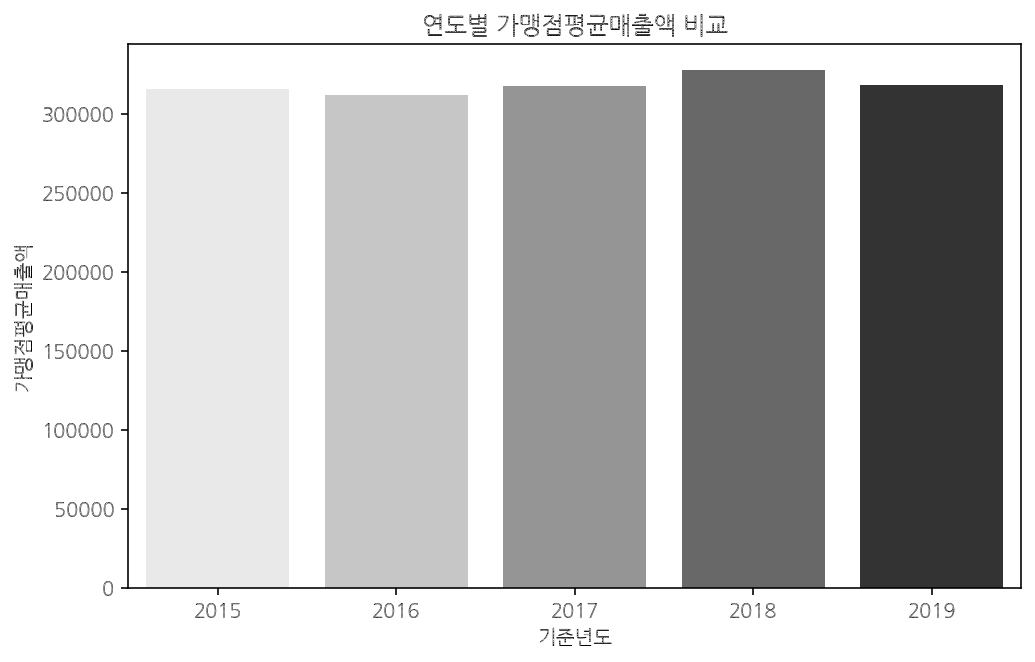

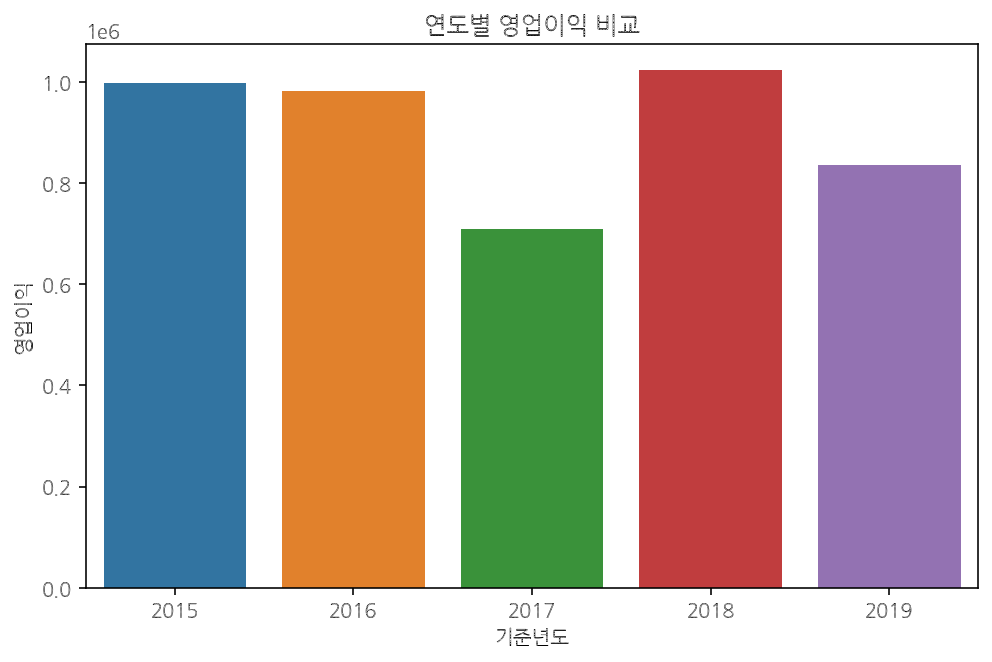

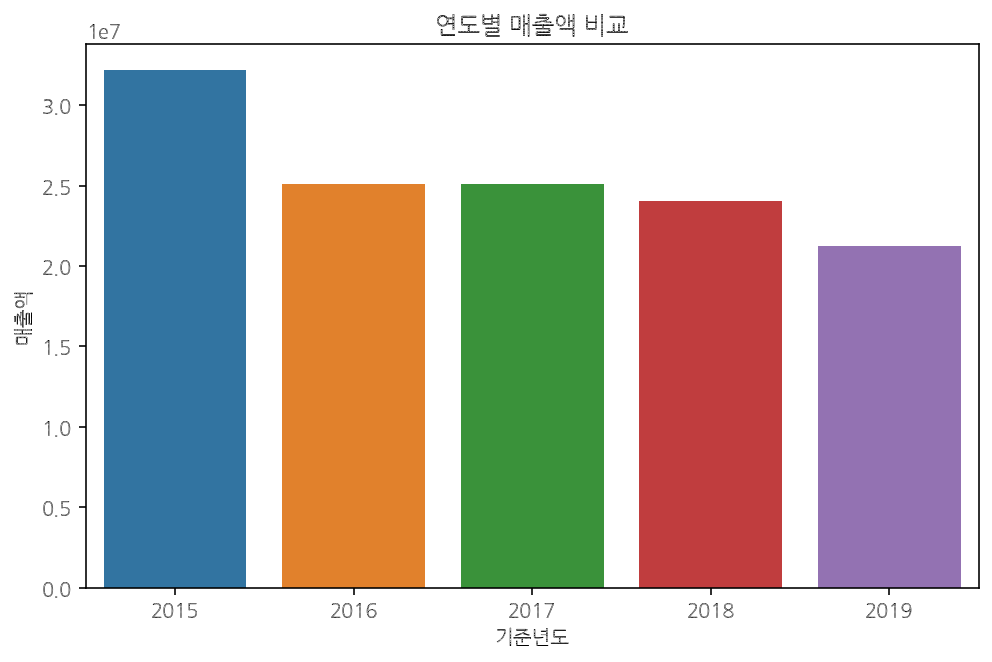

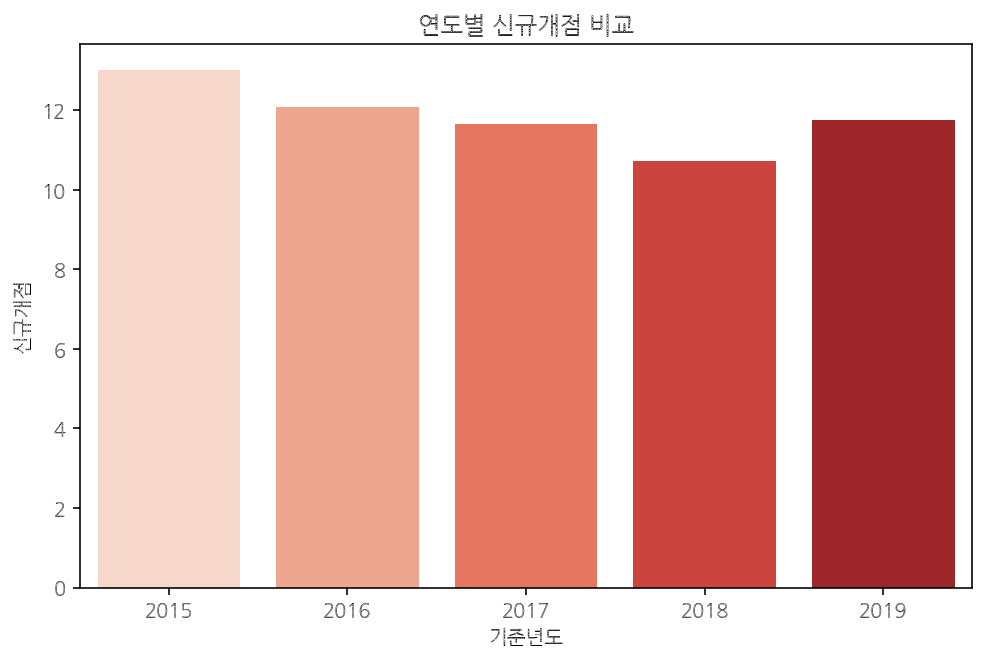

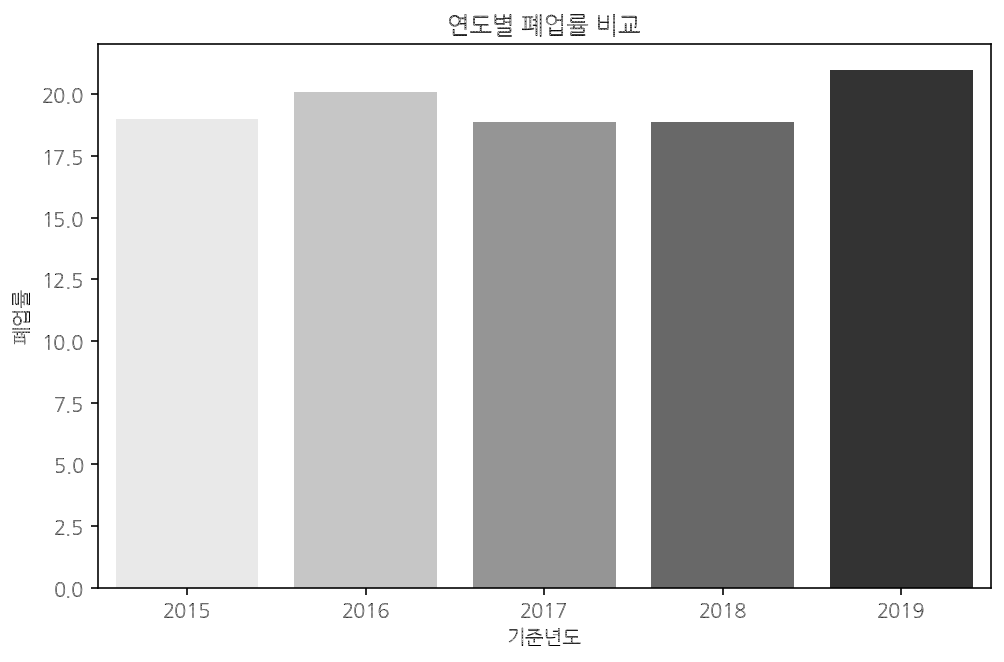

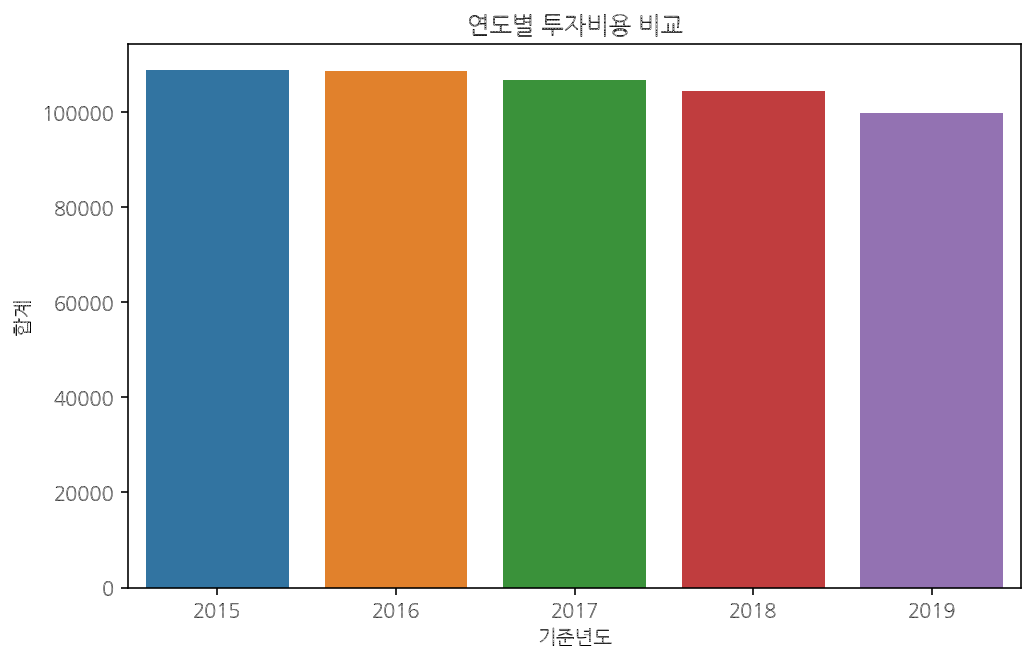

In [ ]:
# bar plot 그리기
ax= plt.figure(1, figsize = (8, 5)) 
sns.barplot(x='기준년도', y='가맹점평균매출액', data=year, palette='Greys')
plt.title('연도별 가맹점평균매출액 비교')

ax= plt.figure(2, figsize = (8, 5)) 
sns.barplot(x='기준년도', y='영업이익', data=year)
plt.title('연도별 영업이익 비교')

ax= plt.figure(3, figsize = (8, 5)) 
sns.barplot(x='기준년도', y='매출액', data=year)
plt.title('연도별 매출액 비교')

ax= plt.figure(4, figsize = (8, 5)) 
sns.barplot(x='기준년도', y='신규개점', data=year, palette='Reds')
plt.title('연도별 신규개점 비교')

ax= plt.figure(5, figsize = (8, 5)) 
sns.barplot(x='기준년도', y='폐업률', data=year, palette='Greys')
plt.title('연도별 폐업률 비교')

ax= plt.figure(6, figsize = (8, 5)) 
sns.barplot(x='기준년도', y='합계', data=year)
plt.title('연도별 투자비용 비교');

##2) 업종별 분석

In [ ]:
category = df.groupby(['업종','기준년도']).mean().reset_index()
category

,업종,기준년도,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc
0,기타외국식,2015,2741.764706,24.235294,15.294118,2.764706,1.176471,1.823529,1.411765,455862.176471,0.000000,19476.470588,2194.117647,3588.235294,130234.705882,155493.529412,2182.352941,127.176471,84329.411765,1.642020e+06,6.496708e+05,9.923488e+05,3.486473e+06,98789.705882,5.715147e+04,0.294118,-1185.846471,30.941765,-5.660588,-4.743529,48.280000,3.000000,21.163529,7.0
1,기타외국식,2016,2169.700000,20.700000,18.250000,4.600000,0.900000,1.050000,0.950000,480130.800000,12705.800000,14465.000000,2805.000000,3450.000000,131958.250000,152678.250000,2311.000000,121.650000,84602.500000,1.459853e+06,2.736295e+05,1.186223e+06,3.644421e+06,95599.500000,2.479690e+04,0.000000,658.191000,22.640500,-0.310000,-0.332500,-67.070500,1.950000,7.048500,7.0
2,기타외국식,2017,1851.000000,21.800000,804.566667,6.400000,0.833333,1.300000,0.666667,420440.866667,16728.700000,11550.000000,2750.000000,3100.000000,91718.733333,109118.733333,2074.933333,87.433333,54899.400000,5.296973e+07,1.237292e+07,4.064406e+07,4.977931e+07,-896626.666667,-2.229819e+06,0.000000,194.450000,26.653667,1.076333,1.970333,31.019667,2.133333,10.665333,7.0
3,기타외국식,2018,1990.806452,25.612903,27.129032,4.870968,1.032258,2.677419,0.806452,413455.000000,12704.516129,12170.967742,3122.580645,3225.806452,110304.806452,128824.161290,2130.387097,102.258065,66470.645161,2.546793e+06,1.075967e+06,1.470826e+06,5.610940e+06,373911.677419,2.710985e+05,0.032258,-3.256774,21.090323,0.867419,-1.301613,61.532581,3.709677,13.122903,7.0
4,기타외국식,2019,1987.771429,25.885714,15.857143,3.857143,1.400000,6.514286,0.971429,327065.342857,13585.428571,10685.714286,3457.142857,2800.000000,94232.571429,111175.428571,2036.428571,220.628571,55553.571429,2.181786e+06,1.015554e+06,1.166232e+06,3.778841e+06,255096.600000,1.990348e+05,0.028571,99.627714,32.263429,-1.365714,-8.965143,22.038857,7.914286,27.870857,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,한식,2015,2308.712166,44.753709,84.685460,8.412463,2.270030,4.192878,1.991098,406798.445104,318.252226,9808.160237,3340.563798,3967.359050,97563.922849,114680.005935,1528.706231,115.445104,55507.851632,1.184703e+07,4.924600e+06,6.922430e+06,1.817226e+07,711619.284866,4.630972e+05,0.139466,-1244.506231,15.338071,2.318487,1.105994,87.838398,6.462908,20.574095,8.0
69,한식,2016,2275.215232,40.728477,77.311258,9.056291,1.526490,3.284768,2.314570,405753.615894,9985.129139,10036.423841,3646.920530,3899.006623,97203.798013,114786.149007,1565.139073,111.430464,55937.367550,8.332256e+06,3.477617e+06,4.912383e+06,1.229748e+07,657182.211921,3.166784e+05,0.009934,557.502483,17.457119,-101.209536,-102.429272,34.809305,4.811258,15.995265,8.0
70,한식,2017,2486.970501,42.589971,68.395280,8.008850,1.560472,4.466077,2.348083,390961.604720,10021.230088,9146.814159,3771.592920,3793.510324,96588.200590,113300.117994,1589.150442,129.572271,55764.778761,1.144089e+07,4.803490e+06,6.637404e+06,1.892710e+07,531398.221239,1.920227e+05,0.020649,-287.616991,21.545841,-138.383274,-6.804749,148.216047,6.026549,17.463510,8.0
71,한식,2018,2359.622222,42.229630,32.876543,7.896296,1.698765,3.592593,2.390123,408071.901235,11536.123457,10081.037037,3872.567901,3536.790123,95686.641975,113177.037037,1605.187654,107.014815,54742.496296,8.115088e+06,3.371979e+06,4.741431e+06,1.500431e+07,447754.555556,2.096588e+05,0.074074,-19.421481,21.764272,-4.151704,-2.793309,-333.667358,5.291358,15.800420,8.0


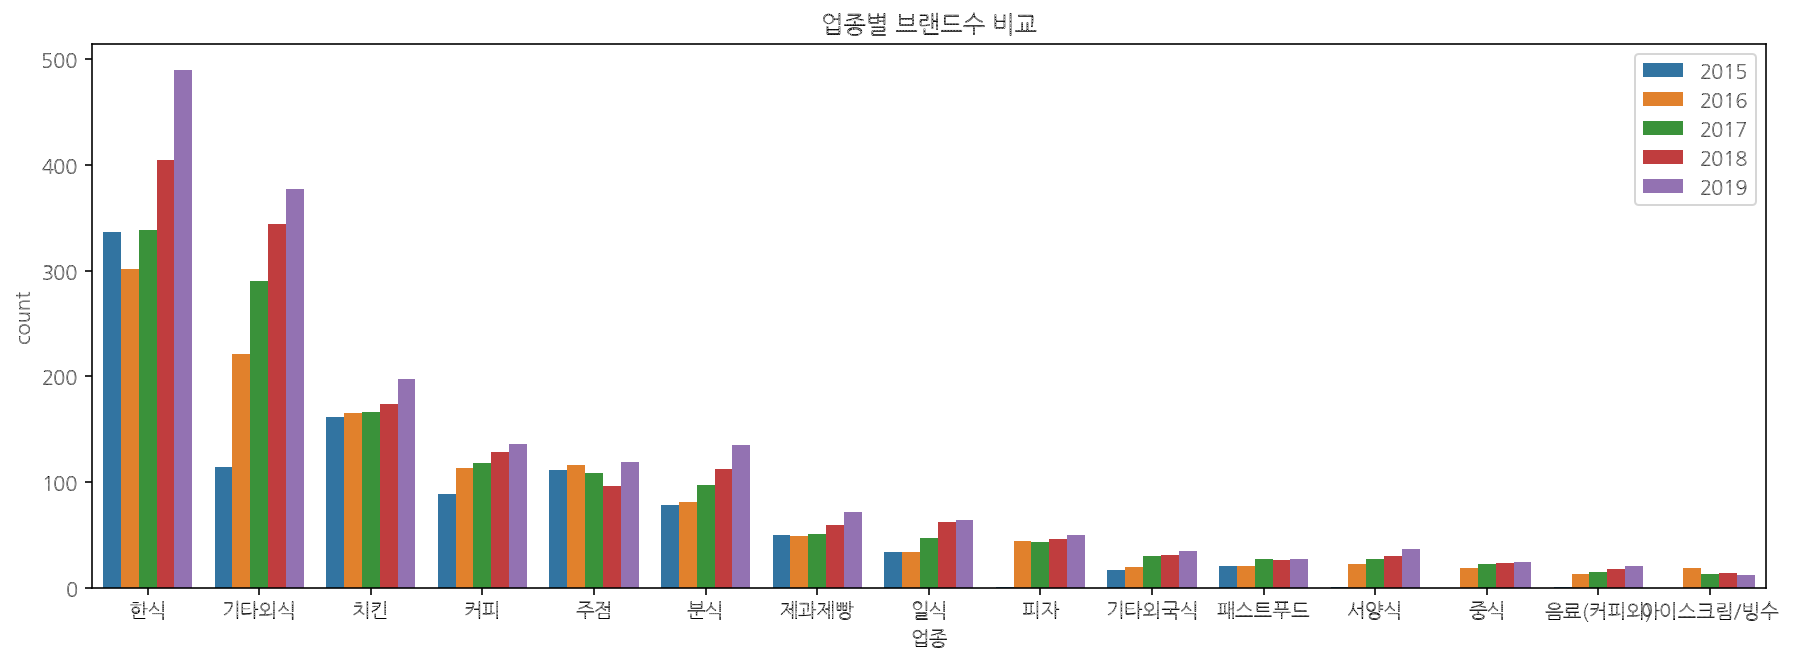

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('업종',data=df, hue='기준년도',order = df['업종'].value_counts().index)
plt.title('업종별 브랜드수 비교')
plt.legend(loc='upper right');

- 아이스크림/빙수 업종을 제외하고 전부 2019년 브랜드수 증가

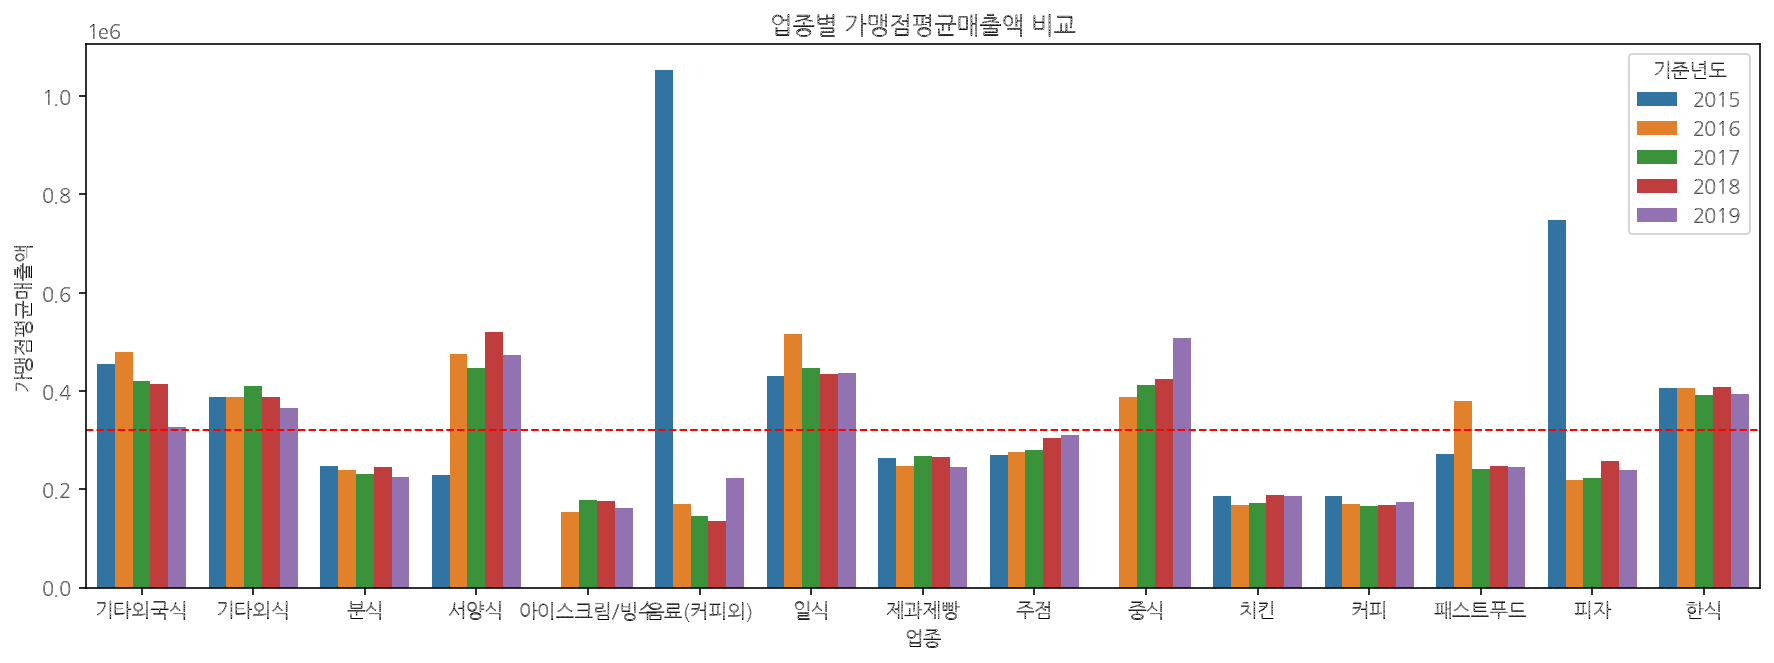

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='업종',y='가맹점평균매출액',data=category, hue='기준년도')
plt.axhline(category['가맹점평균매출액'].mean(), color='red', linestyle='--', linewidth=1)
plt.title('업종별 가맹점평균매출액 비교');

- 2개년 이상 가맹점 평균 매출액이 증가하는 업종 : 주점, 중식, 일식, 커피
- 가맹점 평균 매출액이 꾸준히 증가하는 업종 : 주점, 중식

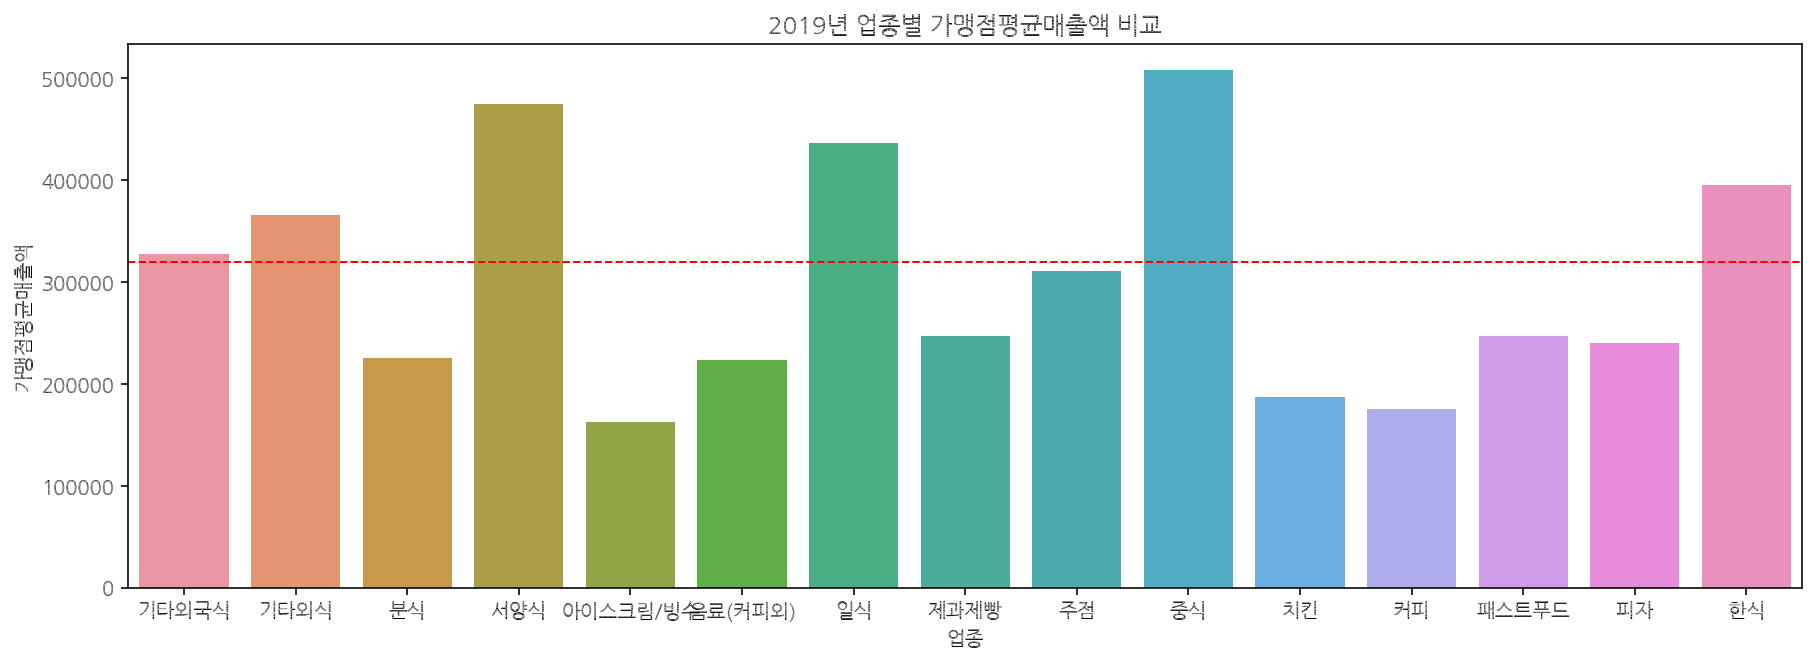

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='업종',y='가맹점평균매출액',data=category[category['기준년도']==2019])
plt.axhline(category['가맹점평균매출액'].mean(), color='red', linestyle='--', linewidth=1)
plt.title('2019년 업종별 가맹점평균매출액 비교');

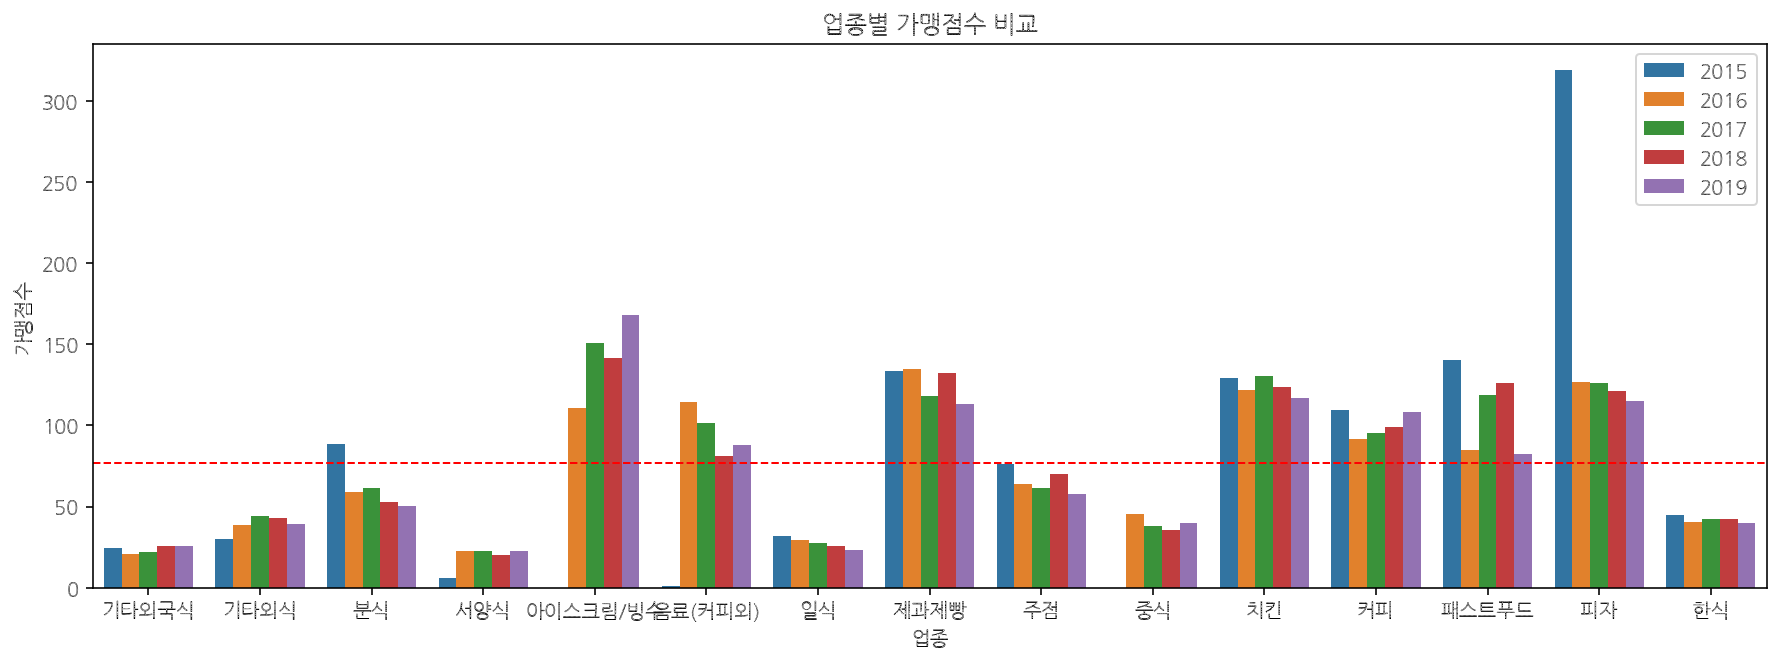

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot('업종','가맹점수',data=category, hue='기준년도')
plt.title('업종별 가맹점수 비교')
plt.axhline(category['가맹점수'].mean(), color='red', linestyle='--', linewidth=1)
plt.legend(loc='upper right');

- 2개년 이상 가맹점 평균 매출액이 증가하면서, 가맹점수도 증가하는 업종 : 커피

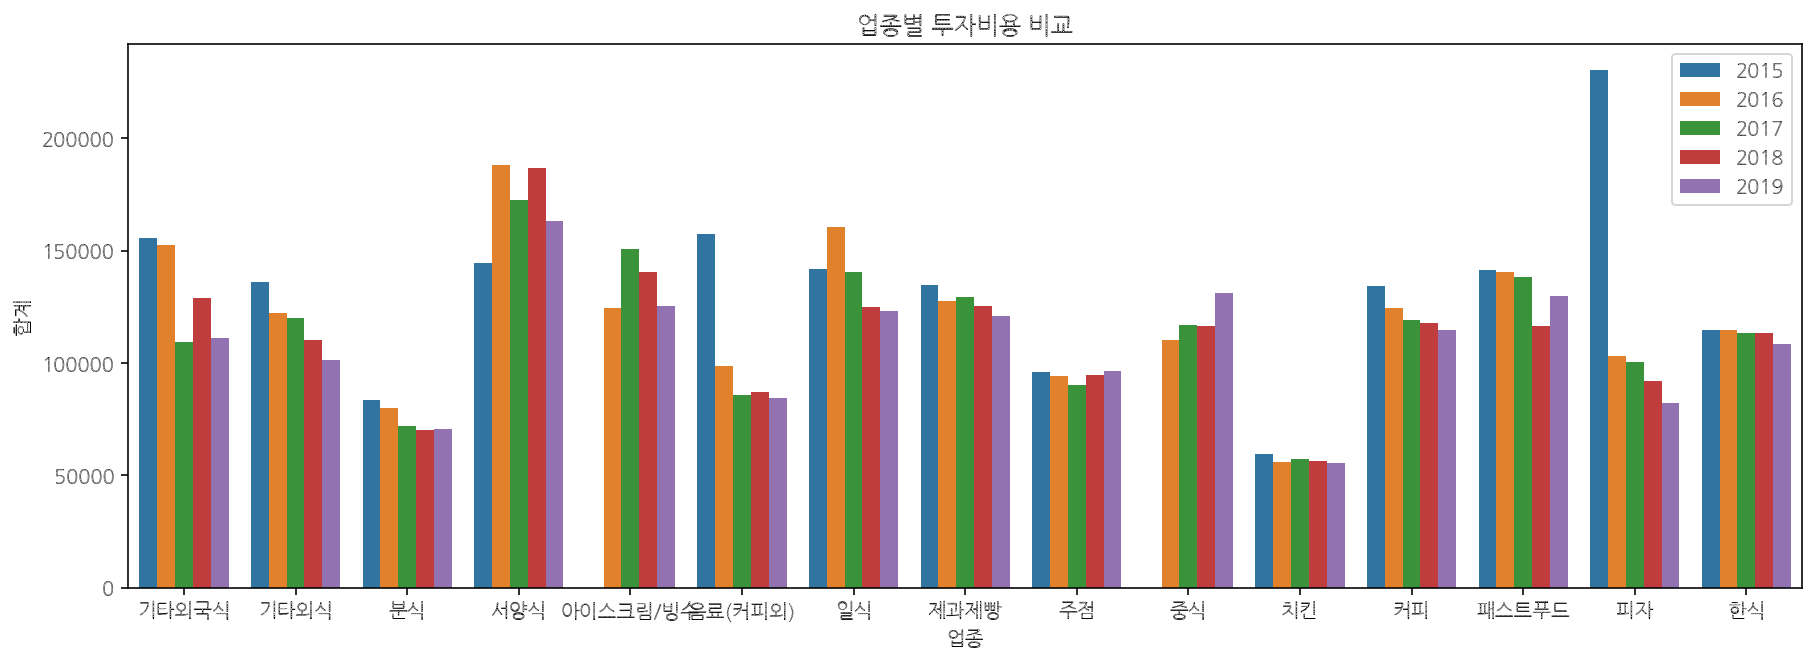

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot('업종','합계',data=category, hue='기준년도')
plt.title('업종별 투자비용 비교')
plt.legend(loc='upper right');

- 치킨과 분식 업종은 비교적 적은 투자비용으로 창업 가능

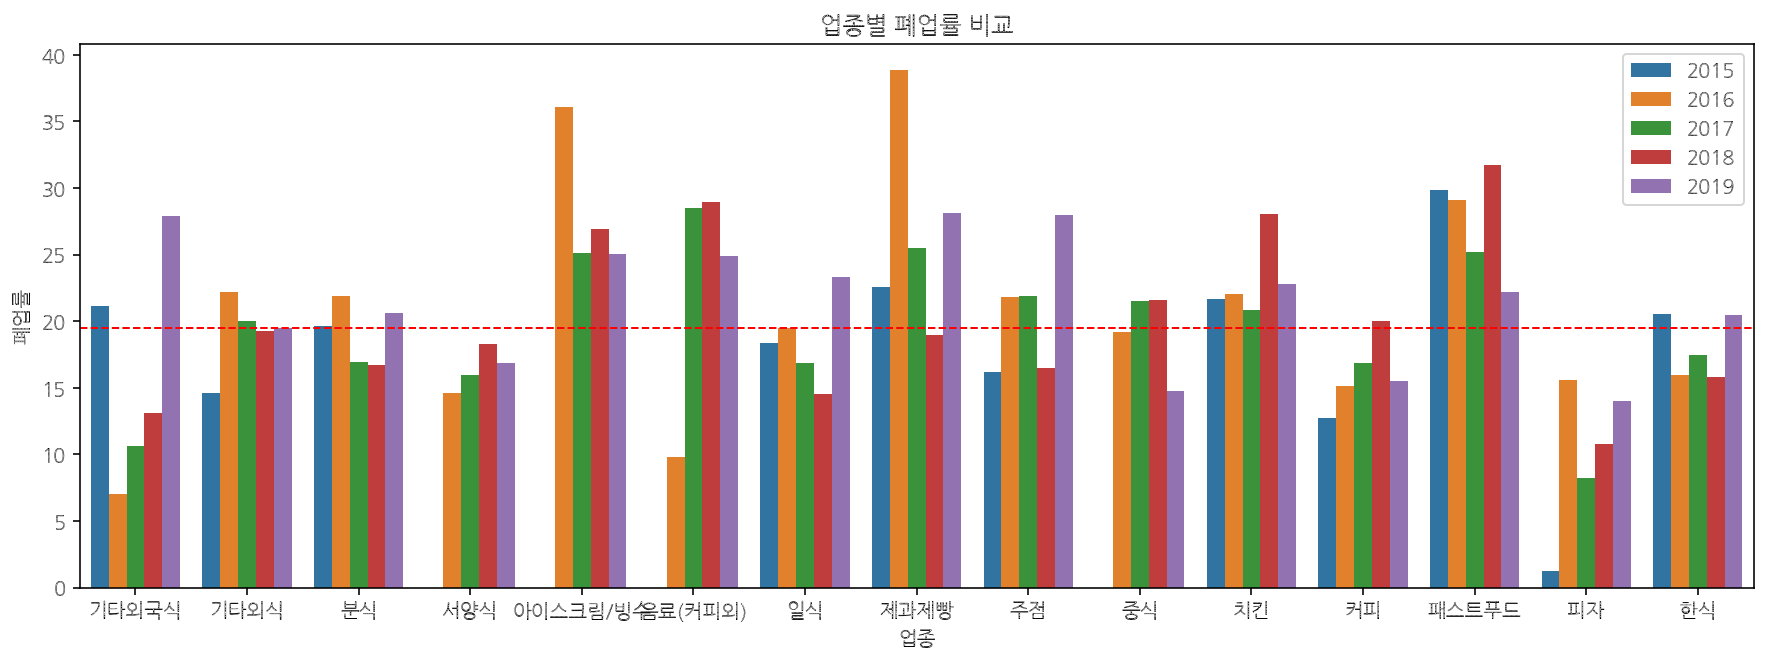

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot('업종','폐업률',data=category, hue='기준년도')
plt.title('업종별 폐업률 비교')
plt.axhline(category['폐업률'].mean(), color='red', linestyle='--', linewidth=1)
plt.legend(loc='upper right');

- 2019년에 폐업률이 증가한 업종 : 기타외국식, 분식, 일식, 제과제빵, 주점, 피자, 한식

##3) 가맹점 평균매출액 기준 분석

In [ ]:
# 업종 & 기준년도별 가맹점 평균 매출액 
avg = category[['업종','기준년도','가맹점평균매출액']]
avg.columns = ['업종','기준년도','업종_기준년도_평균매출액']

# 업종별 평균매출액 merge
df = df.merge(avg, on=['업종','기준년도'])

# 평가 컬럼 생성
df['평가']=(df['가맹점평균매출액']>=df['업종_기준년도_평균매출액'])
df['평가']=df['평가'].astype(int) #0:평균보다 낮음, 1:평균보다 높음

df.head(3)

,브랜드,상호,업종,기준년도,가맹사업개시일,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액,평가
0,국사랑,케이씨컴퍼니,한식,2019,2013-04-01,2466,29,3,5,0,15,3,269167,24248,5500,2200,2000,42900,52600,1760,33,17600,454523,94562,359961,729189,25814,27874,0,380.66,20.80,3.54,3.82,29.48,15,51.72,8,394814.379592,0
1,삼육가珍,(주)레블스,한식,2019,2015-09-24,1560,5,41,0,2,0,0,1540660,19445,11000,3300,4000,82148,100448,1485,99,44550,1201420,-1202020,2403440,3661054,-519377,-558828,0,-199.95,-100.05,-14.19,-15.26,46.49,2,40.00,8,394814.379592,1
2,전준수명품청기와감자탕,다니엘푸드,한식,2019,2016-07-01,1279,18,5,2,0,0,0,619235,15578,5500,3300,5000,101200,115000,2200,132,88000,95394,80739,14655,504254,73424,75974,0,18.15,84.64,14.56,15.07,94.10,0,0.00,8,394814.379592,1


In [ ]:
eval = df.groupby(['기준년도','업종','평가']).mean().reset_index()
eval

,기준년도,업종,평가,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액
0,2015,기타외국식,0,3192.125000,11.250000,7.250000,2.375000,0.500000,2.375000,0.250000,280234.500000,0.000000,16225.000000,3700.000000,4250.000000,111146.875000,135321.875000,1942.500000,107.375000,65600.000000,1.314684e+06,5.092622e+05,8.054220e+05,2.467666e+06,7.981375e+03,-6.054512e+04,0.250000,-2674.278750,24.032500,-11.000000,-8.115000,41.772500,2.875000,32.103750,7.0,455862.176471
1,2015,기타외국식,1,2341.444444,35.777778,22.444444,3.111111,1.777778,1.333333,2.444444,611975.666667,0.000000,22366.666667,855.555556,3000.000000,147201.666667,173423.888889,2395.555556,144.777778,100977.777778,1.932984e+06,7.744783e+05,1.158506e+06,4.392080e+06,1.795082e+05,1.617707e+05,0.333333,137.204444,37.083333,-0.914444,-1.746667,54.064444,3.111111,11.438889,7.0,455862.176471
2,2015,기타외식,0,2131.360000,28.520000,236.666667,5.893333,1.413333,2.693333,1.066667,207669.760000,0.000000,7707.333333,2837.333333,2993.333333,73434.146667,86972.146667,1642.986667,78.346667,38641.226667,1.925115e+07,7.672672e+06,1.157844e+07,2.813026e+07,-4.170464e+04,2.322093e+05,0.213333,167.445600,8.841333,-0.197467,-0.054800,21.449733,4.106667,16.577067,6.0,386908.894737
3,2015,기타외식,1,2142.179487,33.692308,28.615385,9.794872,0.666667,2.923077,1.692308,731599.538462,1283.974359,17261.538462,4921.794872,8564.102564,199632.205128,230379.641026,2020.230769,184.461538,123672.051282,1.003928e+07,1.604304e+06,8.434976e+06,1.139280e+07,8.839666e+05,6.771745e+05,0.128205,-778.453846,35.297179,6.566410,5.280513,16.303846,3.589744,10.916154,6.0,386908.894737
4,2015,분식,0,2250.195652,90.369565,26.217391,14.086957,6.739130,7.847826,8.000000,141288.456522,0.000000,5866.304348,2460.217391,2260.869565,53179.782609,63767.173913,2012.108696,44.130435,25490.434783,5.276175e+06,2.075380e+06,3.200795e+06,7.936056e+06,2.791894e+05,3.977559e+04,0.152174,81.621739,5.306304,-8.110870,-6.506739,29.347174,14.586957,23.665000,12.0,247062.320513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,2019,패스트푸드,1,5607.000000,164.555556,2276.666667,7.111111,2.000000,5.777778,14.222222,458662.222222,14807.222222,14065.888889,4406.111111,28777.777778,207110.222222,254360.000000,2429.444444,114.888889,87124.333333,2.244735e+08,8.020673e+07,1.442667e+08,2.977456e+08,6.858400e+06,1.545776e+06,0.000000,68.738889,19.553333,-1.861111,-3.000000,16.576667,7.777778,20.312222,15.0,246468.518519
139,2019,피자,0,3977.000000,119.222222,10.629630,6.074074,2.111111,7.555556,6.925926,134145.074074,9301.333333,6218.888889,2742.962963,2896.296296,53952.000000,65810.148148,1760.407407,38.037037,20134.259259,4.220478e+06,3.000355e+06,1.220122e+06,3.451873e+06,1.275689e+05,7.158945e+05,0.037037,-827.604074,7.150741,-2.245556,3.542593,-122.128889,9.666667,16.936667,2.0,240052.080000
140,2019,피자,1,3094.608696,110.652174,81.173913,19.869565,2.260870,4.304348,8.608696,364377.695652,16950.608696,11492.913043,3988.695652,3969.565217,81917.260870,101368.434783,1714.347826,53.347826,31193.695652,1.716755e+07,1.024200e+07,6.935252e+06,2.219019e+07,1.460102e+06,1.451538e+06,0.043478,196.871304,49.260870,5.315652,6.167391,66.161739,6.565217,10.574348,2.0,240052.080000
141,2019,한식,0,2323.757962,43.286624,36.570064,10.691083,1.585987,4.726115,2.398089,236639.334395,9219.184713,7421.687898,3332.165605,2846.815287,74206.474522,87807.143312,1557.888535,108.054140,42098.869427,1.013936e+07,4.065800e+06,6.073560e+06,1.729780e+07,3.470287e+05,7.181373e+03,0.057325,326.754268,27.712134,-10.797389,-9.588854,-2.788057,6.312102,23.305446,8.0,394814.379592


In [ ]:
eval1 = pd.DataFrame(df[df['기준년도']==2019]['평가'].value_counts(normalize=True)).reset_index()
eval1['기준'] = 2019
eval2 = pd.DataFrame(df[df['기준년도']==2018]['평가'].value_counts(normalize=True)).reset_index()
eval2['기준'] = 2018
eval3 = pd.DataFrame(df[df['기준년도']==2017]['평가'].value_counts(normalize=True)).reset_index()
eval3['기준'] = 2017
eval4 = pd.DataFrame(df[df['기준년도']==2016]['평가'].value_counts(normalize=True)).reset_index()
eval4['기준'] = 2016
eval5 = pd.DataFrame(df[df['기준년도']==2015]['평가'].value_counts(normalize=True)).reset_index()
eval5['기준'] = 2015

eval_tmp = pd.concat([eval1, eval2])
eval_tmp = pd.concat([eval_tmp, eval3])
eval_tmp = pd.concat([eval_tmp, eval4])
eval_tmp = pd.concat([eval_tmp, eval5])
eval_tmp.columns = ['기준','브랜드비율','기준년도']

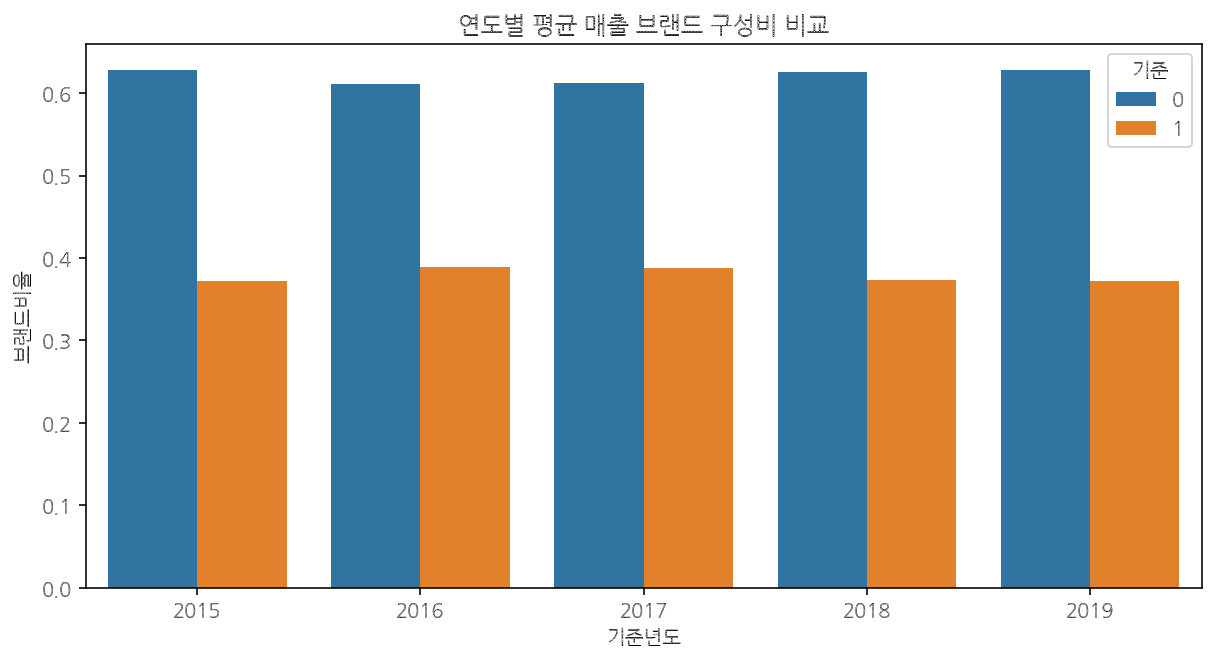

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(eval_tmp['기준년도'], eval_tmp['브랜드비율'], hue=eval_tmp['기준'])
plt.title('연도별 평균 매출 브랜드 구성비 비교');

- 매년 업종별 가맹점 평균매출액 이하인 브랜드 수는 전체의 0.6, 이상인 브랜드 수는 전체의 0.4에서 대략적으로 유지

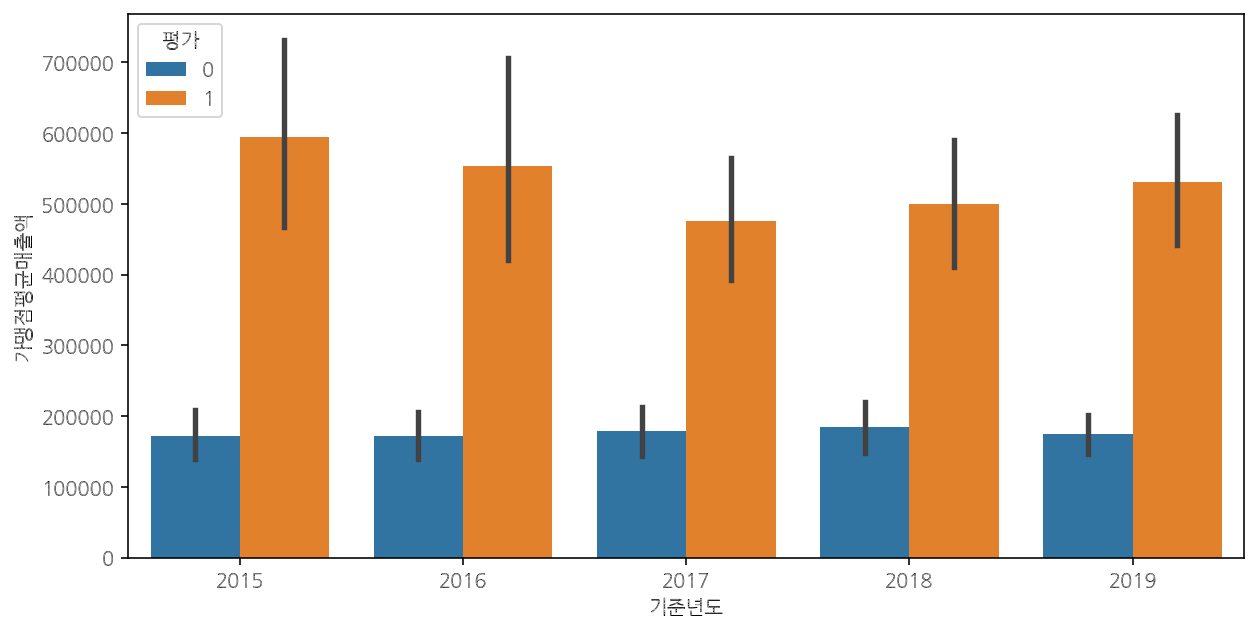

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='기준년도', y='가맹점평균매출액', data=eval, hue='평가');

- 가맹점 평균매출액 이하인 브랜드의 가맹점 평균매출액은 거의 변동이 없는 반면, 이상인 브랜드의 매출액은 2017년을 기점으로 증가하는 추세

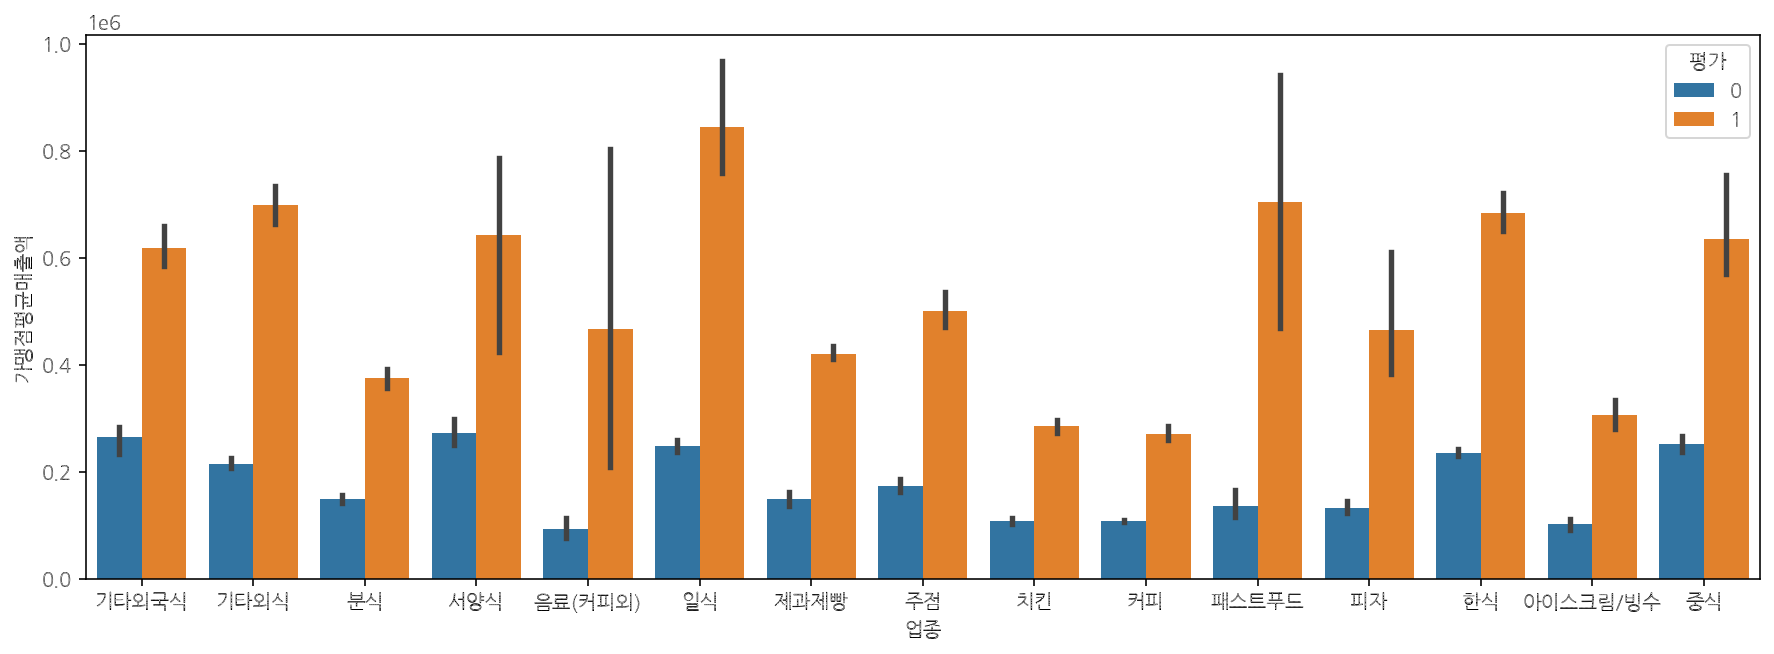

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='업종', y='가맹점평균매출액', data=eval, hue='평가');

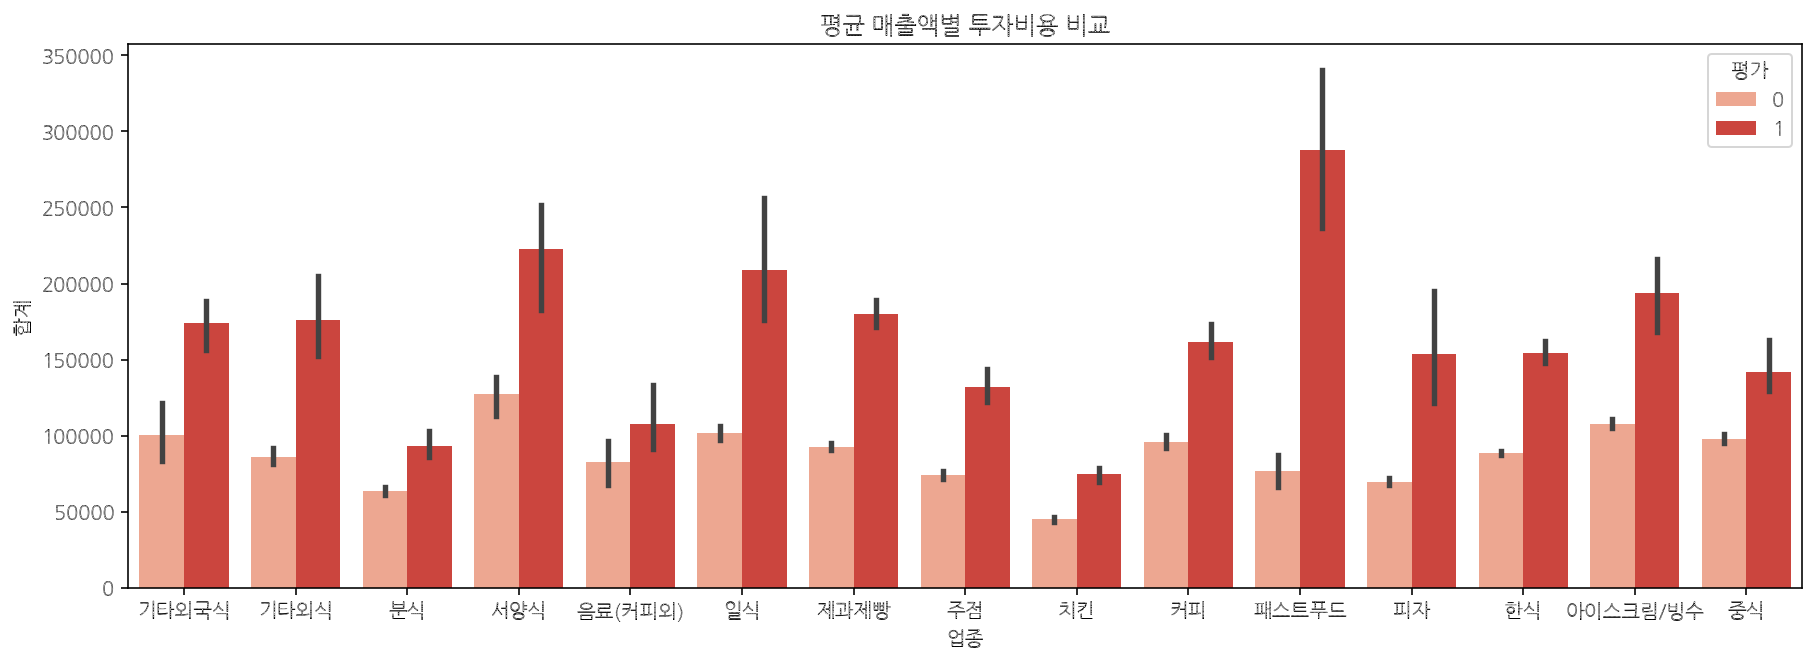

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='업종', y='합계', data=eval, hue='평가', palette='Reds')
plt.title('평균 매출액별 투자비용 비교');

- 평균 매출액 이상인 브랜드는 이하인 브랜드보다 총 투자비용 합계가 높다.

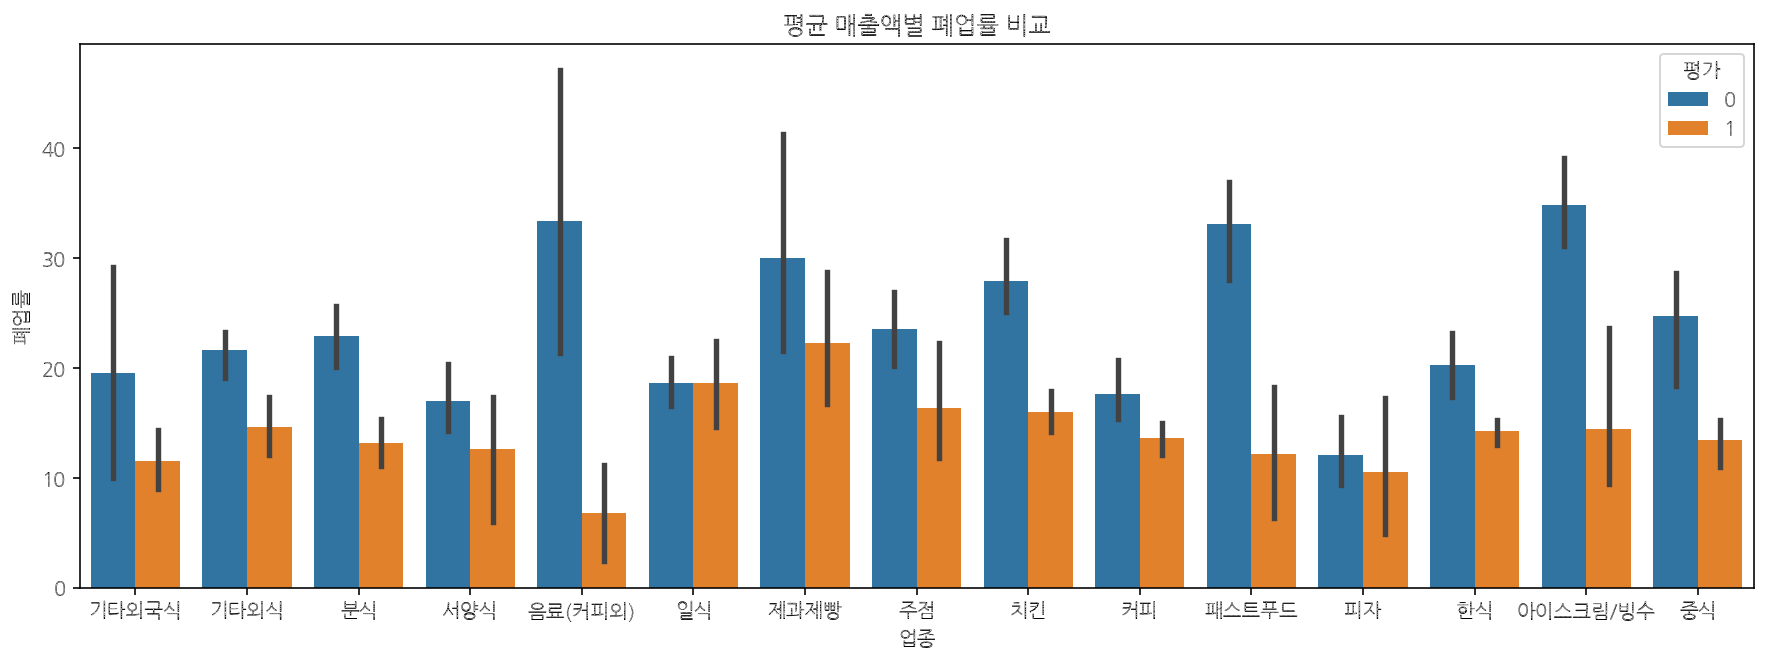

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='업종', y='폐업률', data=eval, hue='평가')
plt.title('평균 매출액별 폐업률 비교');

- 음료(커피외) 업종은 평균매출액 이상인 경우 폐업률이 가장 낮고, 이하일 경우 폐업률이 가장 높다.

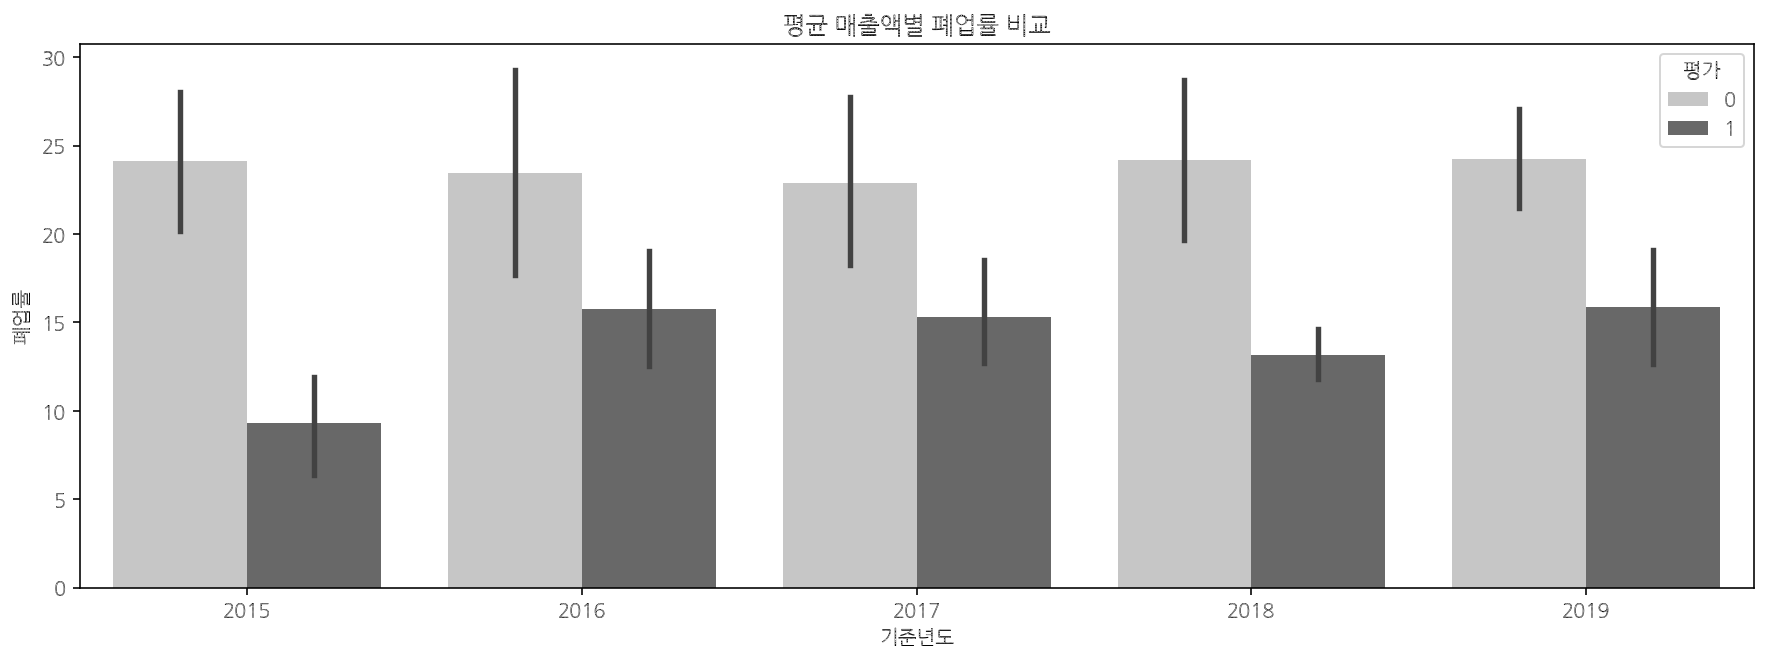

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(x='기준년도', y='폐업률', data=eval, hue='평가', palette='Greys')
plt.title('평균 매출액별 폐업률 비교');

##4) 특성별 top 100 분석

In [ ]:
# 신규개점 top 100 브랜드
top = df[df['기준년도']==2019].sort_values('신규개점',ascending=False)[:100]
top.head()

,브랜드,상호,업종,기준년도,가맹사업개시일,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액,평가
1174,메가엠지씨커피(MEGA MGC COFFEE),(주)앤하우스,커피,2019,2016-03-09,1393,798,0,398,0,3,55,275854,20270,0,3300,2000,51590,56890,1581,26,12650,24323885,18171588,6152297,35019820,18328333,14918851,0,33.86,74.71,52.34,42.60,82.10,3,0.38,1,174920.147059,1
1213,이디야커피,(주)이디야,커피,2019,2001-08-17,6711,2651,407,302,0,50,213,216931,8415,9900,3300,5000,110270,128470,2090,66,41800,124860906,69955817,54905089,220779522,19447929,14722553,0,78.49,56.03,8.81,6.67,21.05,50,1.89,1,174920.147059,1
1411,역전할머니맥주1982,(주)역전에프앤씨,주점,2019,2016-11-04,1153,385,29,234,0,0,45,667973,21458,7700,3300,2000,60860,73860,1907,50,28600,17026186,11183422,5842764,33097923,13225427,10258749,0,52.24,65.68,39.96,31.00,91.73,0,0.00,11,310681.512605,1
1424,가마치통닭,(주)티지와이,기타외식,2019,2016-06-01,1309,398,18,220,0,19,49,237133,17035,2750,550,3000,42600,48900,1430,66,28600,3897485,1628358,2269127,24255268,1074297,843363,0,139.35,41.78,4.43,3.48,51.79,19,4.77,6,365424.055703,0
825,처갓집양념치킨,(주)한국일오삼,치킨,2019,1983-03-07,13449,1134,42,208,35,64,24,215716,15597,3300,1100,1000,21450,26850,1320,33,13200,55401897,37869882,17532015,79700161,12478915,7780296,0,46.30,68.35,15.66,9.76,20.54,99,8.73,3,187303.702020,1


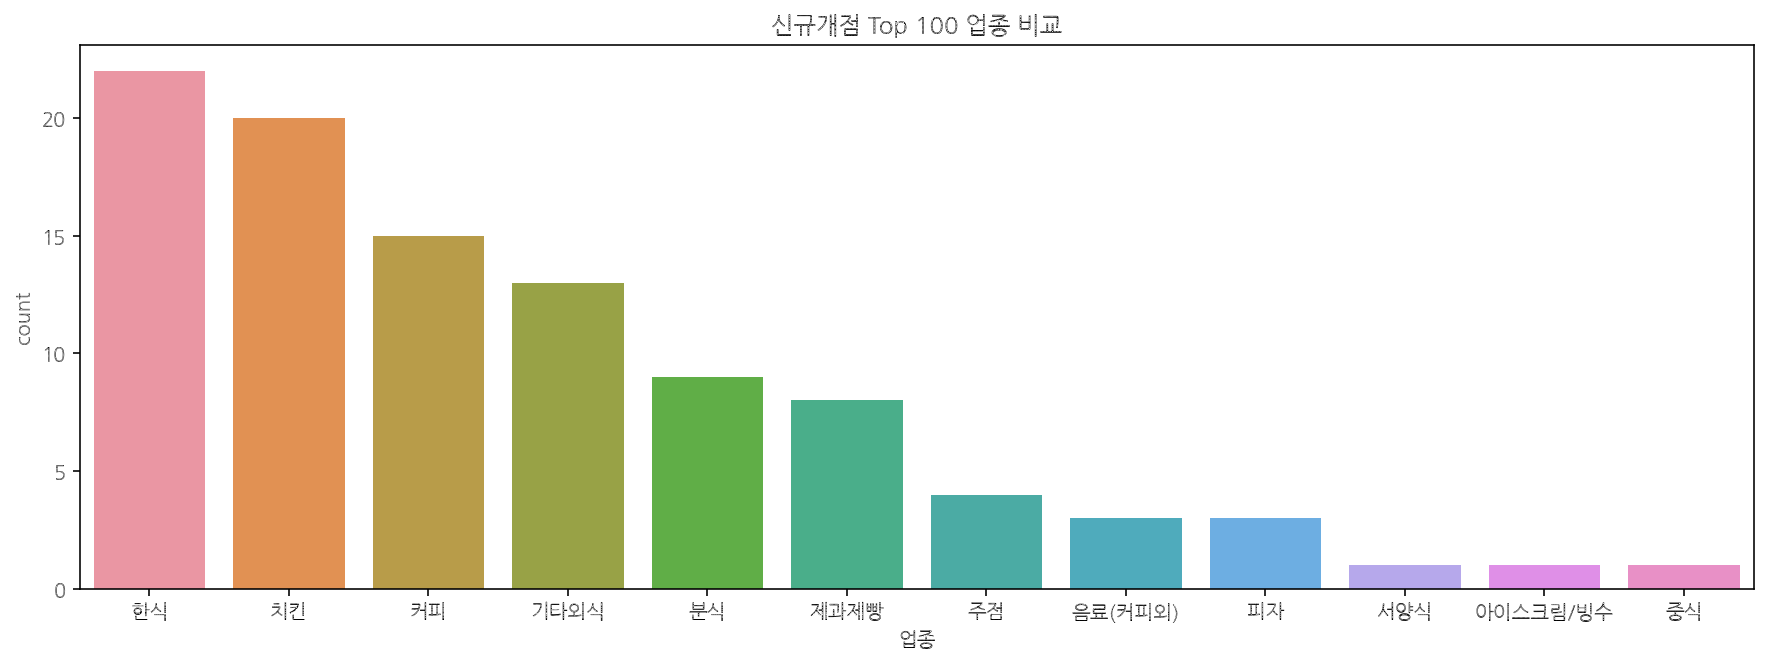

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('업종',data=top, order = top['업종'].value_counts().index)
plt.title('신규개점 Top 100 업종 비교');

In [ ]:
# 가맹점 평균 매출액 Top 10
top.sort_values('가맹점평균매출액', ascending=False)[:10]

,브랜드,상호,업종,기준년도,가맹사업개시일,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액,평가
197,연안식당,(주)디딤,한식,2019,2017-12-17,745,209,177,111,0,17,14,904846,25301,11000,5500,5000,105875,127375,2383,99,71500,117030401,32760278,84270123,125265878,3493797,1357910,0,257.23,27.99,2.79,1.08,4.14,17,8.13,8,394814.379592,1
1690,이차돌,(주)다름플러스,기타외식,2019,2017-03-06,1031,227,73,124,0,3,10,833828,25042,9900,3300,3000,130570,146770,1760,99,52800,13969909,7187575,6782334,56365218,5663906,5042001,0,94.36,51.45,10.05,8.95,70.15,3,1.32,6,365424.055703,1
1411,역전할머니맥주1982,(주)역전에프앤씨,주점,2019,2016-11-04,1153,385,29,234,0,0,45,667973,21458,7700,3300,2000,60860,73860,1907,50,28600,17026186,11183422,5842764,33097923,13225427,10258749,0,52.24,65.68,39.96,31.00,91.73,0,0.00,11,310681.512605,1
1076,파리바게뜨,(주)파리크라상,제과제빵,2019,1988-09-30,11415,3380,7106,90,5,71,247,665567,24951,14300,2750,20000,269900,306950,2980,99,89400,1610152013,738060841,872091172,1835110668,76071852,6441023,0,118.16,45.84,4.15,0.35,0.87,76,2.25,4,246412.180556,1
1422,보고싶다,보고싶다(주),기타외식,2019,2018-08-07,512,79,20,61,0,0,9,657633,14860,5500,5500,2000,116314,129314,1870,99,56100,1904994,650705,1254289,12340962,509965,463060,0,192.76,34.16,4.13,3.75,71.16,0,0.00,6,365424.055703,1
985,교촌치킨,교촌에프앤비(주),치킨,2019,1994-06-01,9345,1157,242,86,0,2,90,652690,34630,8827,3550,10000,84307,106684,2207,99,66220,130483130,73150810,57332320,369252584,31920502,21045132,0,78.38,56.06,8.64,5.70,28.77,2,0.17,3,187303.702020,1
1640,족발야시장,(주)족발야시장,기타외식,2019,2016-08-08,1241,142,35,54,0,3,9,636126,21256,11000,2200,3000,73600,89800,1650,99,49500,6827128,2750973,4076155,9919114,1199057,1104625,0,148.17,40.29,12.09,11.14,40.15,3,2.11,6,365424.055703,1
520,두끼,(주)다른,분식,2019,2015-03-24,1744,218,45,54,0,0,20,603228,11980,22000,5500,5000,144936,177436,1980,99,59400,10137346,4187201,5950145,28854720,5423044,4305521,0,142.10,41.30,18.79,14.92,102.83,0,0.00,12,225137.037037,1
928,비비큐(BBQ),(주)제너시스비비큐,치킨,2019,1995-09-01,8888,1604,228,88,90,30,44,577875,43190,11000,4180,5000,70609,90789,2035,66,40700,108620370,56949544,51670826,243761290,25921171,14075901,1,90.73,52.43,10.63,5.77,24.72,120,7.48,3,187303.702020,1
141,황금코다리,(주)유니쉐프,한식,2019,2016-03-24,1378,107,10,54,0,5,8,549884,8494,5500,5500,5000,130900,146900,1650,165,82500,533058,229911,303147,1589940,131513,122674,0,131.85,43.13,8.27,7.72,53.36,5,4.67,8,394814.379592,1


In [ ]:
# 폐업률 top 100 브랜드
top_ = df[df['기준년도']==2019].sort_values('폐업률',ascending=False)[:100]
top_.head()

,브랜드,상호,업종,기준년도,가맹사업개시일,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액,평가
199,차돌6키로,(주)디딤,한식,2019,2018-02-13,687,1,177,0,7,0,0,314341,13831,11000,5500,5000,105875,127375,2383,99,71500,117030401,32760278,84270123,125265878,3493797,1357910,0,257.23,27.99,2.79,1.08,4.14,7,700.0,8,394814.379592,0
358,무한장소,(주)제이씨엠에프씨,한식,2019,2016-11-25,1132,8,7,0,0,24,0,100179,1715,11000,2200,3000,131450,147650,1815,165,90750,701613,225425,476188,1509252,7207,26314,0,211.24,32.13,0.48,1.74,11.67,24,300.0,8,394814.379592,0
1583,상 동양수산,(주)일센치,기타외식,2019,2017-08-01,883,6,3,0,18,0,0,351803,10554,6600,3300,1000,49500,60400,1320,82,33000,32784,-467266,500050,47430,-168519,-510481,0,-107.02,-1425.29,-355.30,-1076.28,109.25,18,300.0,6,365424.055703,0
549,부들부들떡볶이,(주)부들부들,분식,2019,2018-03-01,671,2,2,0,0,6,0,146430,9762,5500,3300,0,51150,59950,1430,50,21450,350605,154964,195641,370747,4794,5360,0,126.25,44.20,1.29,1.45,3.46,6,300.0,12,225137.037037,0
1243,나인어클락커피,(주)나인어클락,커피,2019,2014-08-01,1979,2,3,0,4,0,0,227277,4732,3300,1650,0,67100,72050,2200,66,44000,32112,-70847,102959,181285,220,553,0,-145.33,-220.62,0.12,0.31,-0.78,4,200.0,1,174920.147059,1


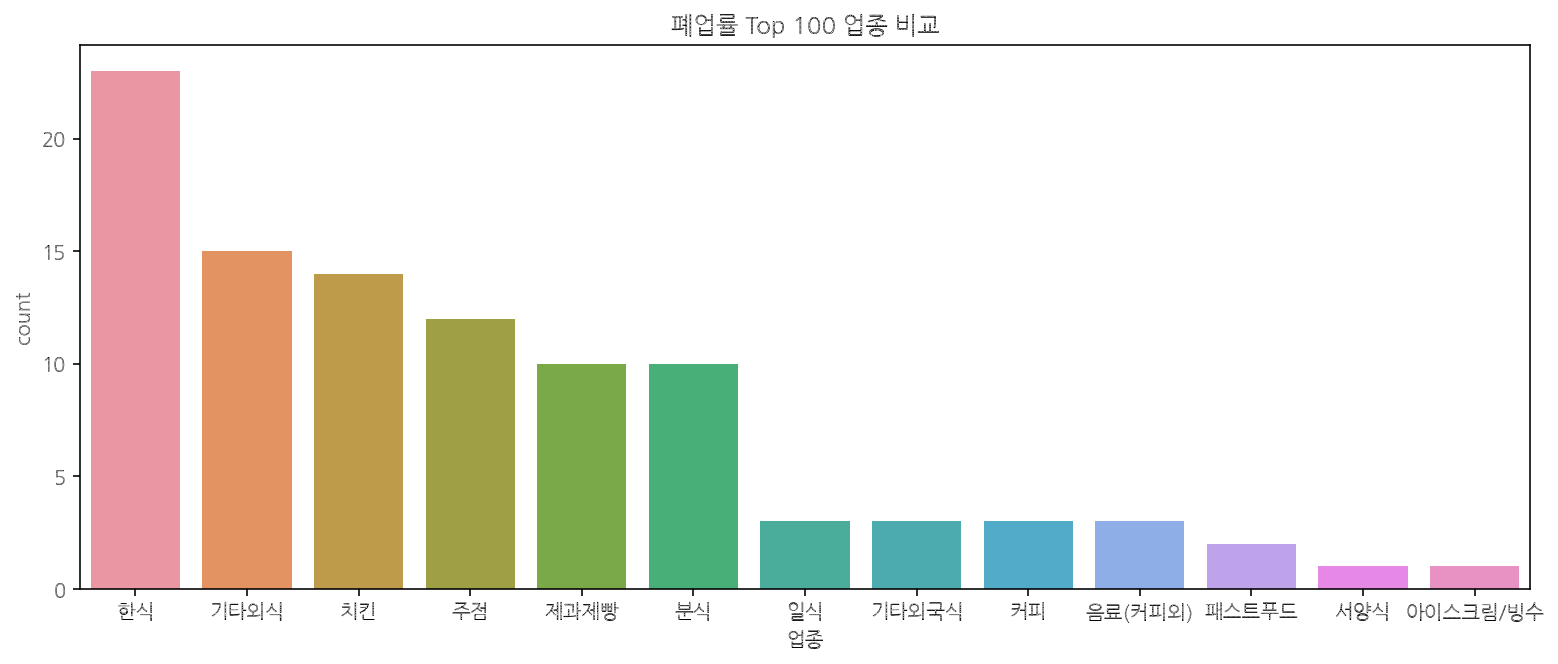

In [ ]:
plt.figure(figsize=(13,5))
sns.countplot('업종',data=top_, order = top_['업종'].value_counts().index)
plt.title('폐업률 Top 100 업종 비교');

- 한식과 치킨은 신규개점이 많은만큼 폐업률도 높으므로 주의가 필요하다.

In [ ]:
# 가맹점 평균 매출액별
top = df[df['기준년도']==2019].sort_values('가맹점평균매출액',ascending=False)[:100]
top.head(3)

,브랜드,상호,업종,기준년도,가맹사업개시일,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액,평가
1653,연타발,(주)행복한구이세상,기타외식,2019,2011-04-05,3193,6,8,0,0,0,0,3616977,12834,33000,11000,30000,180125,254125,3025,825,756250,8013251,5367437,2645814,10063581,1105823,939789,0,49.29,66.98,10.99,9.34,17.51,0,0.00,6,365424.055703,1
259,반주(BANJOO),(주)캘리스코,한식,2019,2015-12-01,1492,1,1511,0,0,0,0,3317161,47388,25300,5500,35000,281000,346800,5000,132,200000,49201000,14361000,34840000,86821000,1346267,419279,0,242.60,29.19,1550.62,482.92,2919.57,0,0.00,8,394814.379592,1
652,쿠우쿠우,(주)쿠우쿠우,일식,2019,2012-03-01,2862,117,28,16,0,4,8,2945261,13468,22000,0,20000,780000,822000,1750,660,350000,11697959,10640298,1057661,8231326,4107166,2342186,1,9.94,90.96,49.90,28.45,22.01,4,3.42,10,436471.640625,1


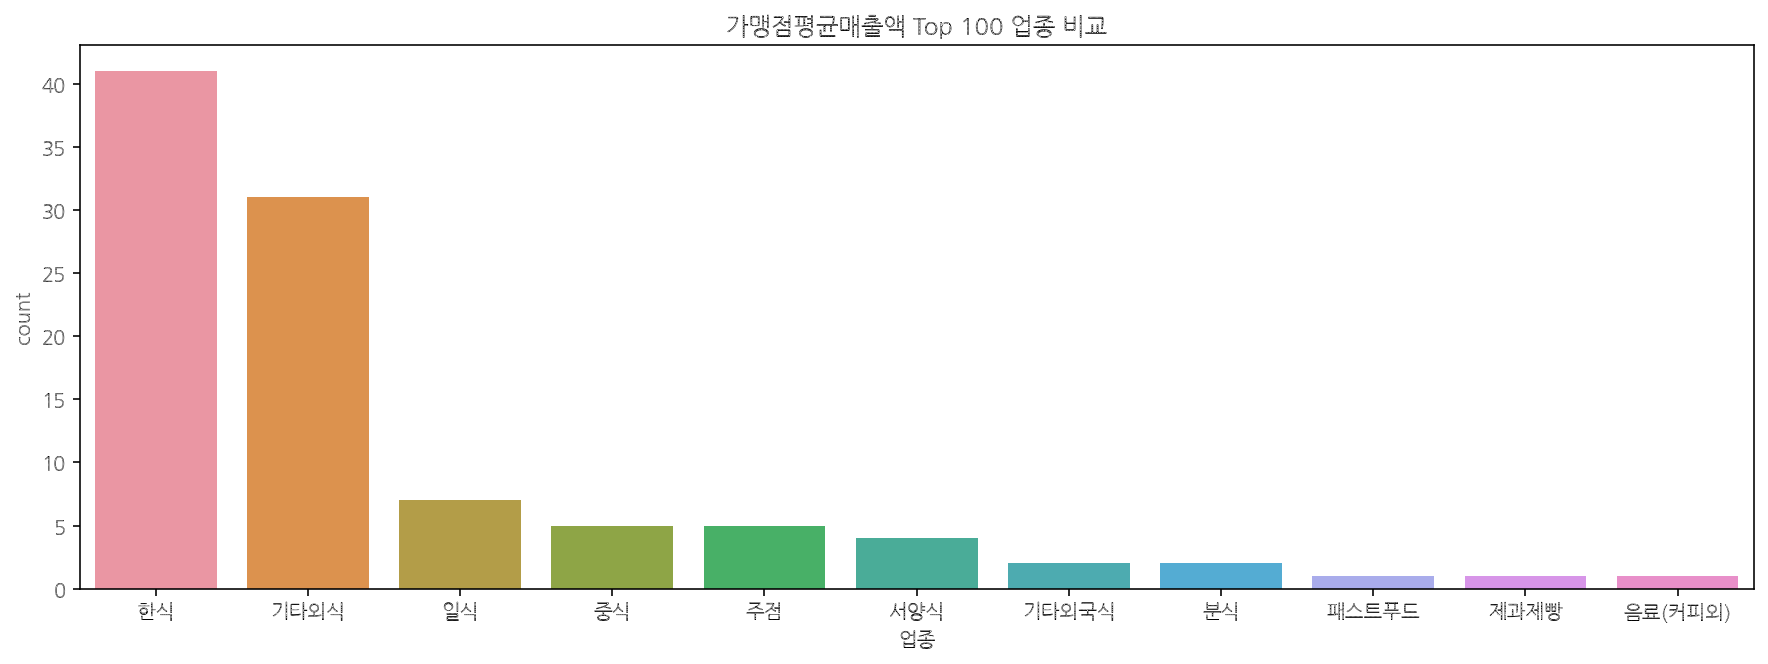

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('업종',data=top, order = top['업종'].value_counts().index)
plt.title('가맹점평균매출액 Top 100 업종 비교');

In [ ]:
# 면적당평균매출액
top2 = df[df['기준년도']==2019].sort_values('면적당평균매출액',ascending=False)[:100]
top2.head()

,브랜드,상호,업종,기준년도,가맹사업개시일,가맹사업일수,가맹점수,가맹본부임직원수,신규개점,계약종료,계약해지,명의변경,가맹점평균매출액,면적당평균매출액,가맹비,교육비,보증금,기타비용,합계,면적당인테리어비용,기준면적,총인테리어비용,자산,자본,부채,매출액,영업이익,당기순이익,법위반횟수,부채비율,자기자본비율,영업이익률,매출액순이익률,자기자본순이익률,폐점,폐업률,업종_enc,업종_기준년도_평균매출액,평가
675,스시한판,(주)제이알인터내셔널,일식,2019,2014-07-16,1995,6,13,0,1,0,0,636811,300115,5500,11000,0,94000,110500,1800,66,36000,5028431,1987023,3041408,8564322,218746,178245,0,153.06,39.52,2.55,2.08,8.97,1,16.67,10,436471.640625,1
671,돈돈정,(주)제이에스푸드컴퍼니,일식,2019,2015-04-10,1727,14,3,0,21,3,0,526441,163781,11000,5500,3000,137500,157000,3300,99,99000,98868,7108,91760,156595,-43251,-45860,0,1290.94,7.19,-27.62,-29.29,-645.19,24,171.43,10,436471.640625,1
674,도쿄이찌바,(주)제이알에프앤씨,일식,2019,2017-05-23,953,7,13,3,0,0,0,535957,107014,5500,11000,0,192700,209200,3850,66,77000,5028431,1987023,3041408,8564322,218746,178245,0,153.06,39.52,2.55,2.08,8.97,0,0.00,10,436471.640625,1
1259,아임홈,(주)아임홈팩토리,커피,2019,2018-03-29,643,6,3,0,0,2,0,350425,106333,7700,3300,5000,111200,127200,3300,99,99000,316520,29985,286535,284746,-30989,-2858,0,955.59,9.47,-10.88,-1.00,-9.53,2,33.33,1,174920.147059,1
639,홍리마라탕,(주)홍리에프앤씨,중식,2019,2018-11-01,426,18,7,15,0,0,0,168821,103511,330,550,0,153200,154080,3850,66,77000,1648877,113799,1535078,2294101,107237,95481,0,1348.94,6.90,4.67,4.16,83.90,0,0.00,9,507724.250000,0


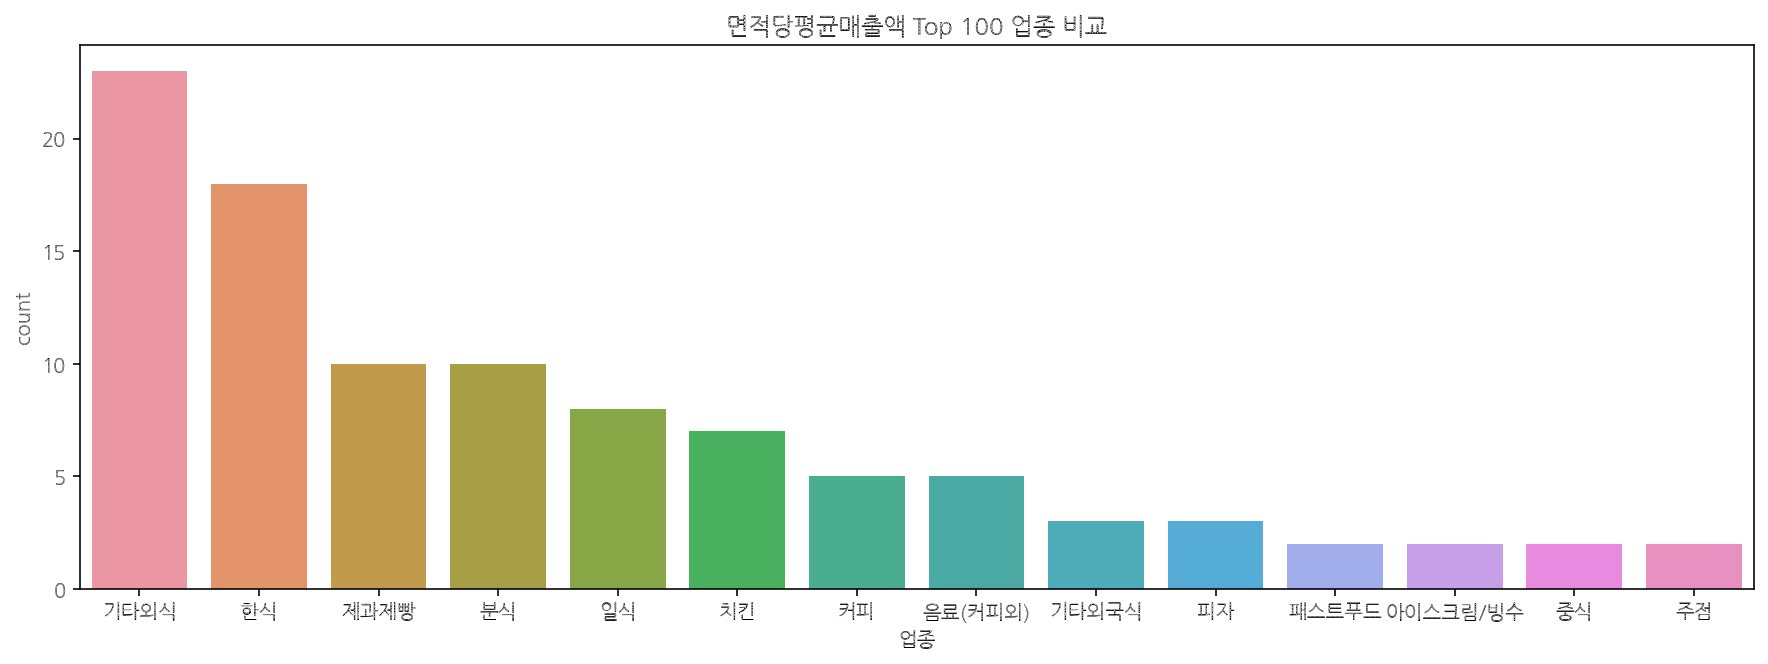

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('업종',data=top2, order = top2['업종'].value_counts().index)
plt.title('면적당평균매출액 Top 100 업종 비교');